Run this notebook to

- xx



## Import stuff and set parameteres

In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import pandas as pd
import scipy as sp
from scipy import stats, ndimage
from scipy.stats import pearsonr 
from itertools import chain, zip_longest
from copy import deepcopy
import glmtools as glm

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

import mne
from mne.stats import permutation_t_test
mne.set_log_level('warning') 

#%matplotlib qt
%matplotlib inline

input_dir = 'TaskstimulusEpochsMastoids'


In [3]:
def load_subj_eeg(path, file, downsample=None):
    fp = os.path.join(path, '%s-epo.fif' % file)
    print('>>> Loading %s' % fp)
    epochs = mne.read_epochs(fp, preload=True)
    if downsample is not None:
        epochs = epochs.resample(downsample)
    return epochs

def load_all_eeg(path, files, downsample=None):
    subject_epochs = [load_subj_eeg(path, file, downsample=downsample) for file in files]
    epochs = mne.epochs.concatenate_epochs(subject_epochs)
    return epochs

In [4]:
participant_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21] # 14 was excluded due to noise

sessions = [1, 2]

partners = ['"overconfident"', '"underconfident"']

epoch_start = 0.25
epoch_end = 0.75

## Correlation reaction time and confidence

In [5]:
%%capture

strategic_correlations = []
non_strategic_correlations = []

for subject in participant_numbers:   
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')

    for session in sessions:
        participant_files = []
        participant_files.append('%i_%i' % (subject, session))
        epochs = load_subj_eeg(path='%s/' % input_dir, file=participant_files[0])

        y = epochs.metadata['participant_confidence'].to_numpy()
        x = epochs.metadata['decision_rt'].to_numpy()

        a = pearsonr(x, y)[0]
        print(a)

        condition = epochs.metadata['condition'].unique()
        if condition == "s":
            strategic_correlations.append(a)
        if condition == "ns":
            non_strategic_correlations.append(a)


In [6]:

print('\nStrategic average correlation confidence and reaction time: %f' % (sum(strategic_correlations) / len(strategic_correlations),))


print('\nNon-strategic average correlation confidence and reaction time: %f' % (sum(non_strategic_correlations) / len(non_strategic_correlations),))



Strategic average correlation confidence and reaction time: -0.193040

Non-strategic average correlation confidence and reaction time: -0.287845


## Median split confidence by participants

>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


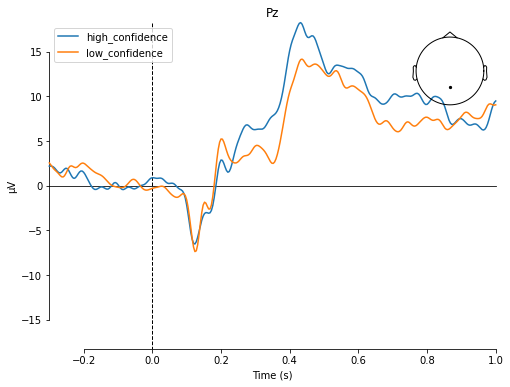

>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


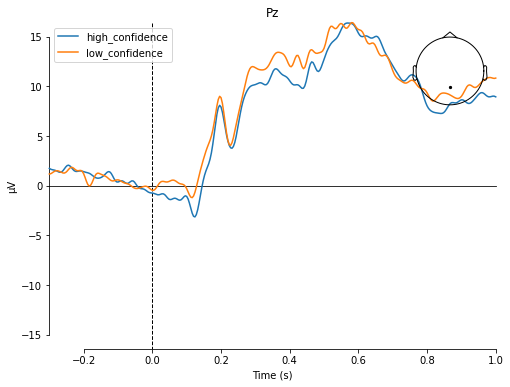

>>> Loading TaskstimulusEpochsMastoids/3_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/3_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


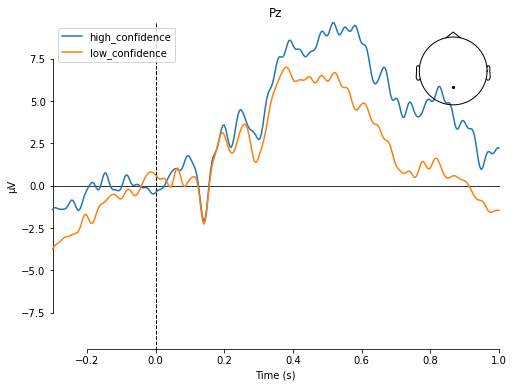

>>> Loading TaskstimulusEpochsMastoids/4_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/4_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


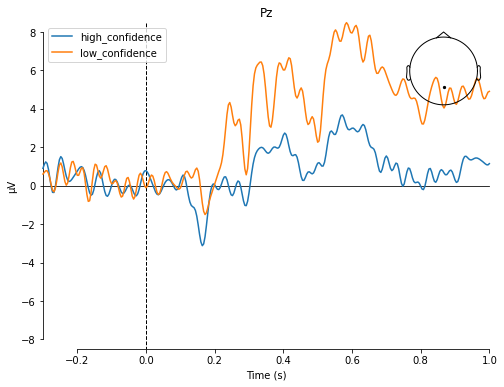

>>> Loading TaskstimulusEpochsMastoids/5_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/5_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


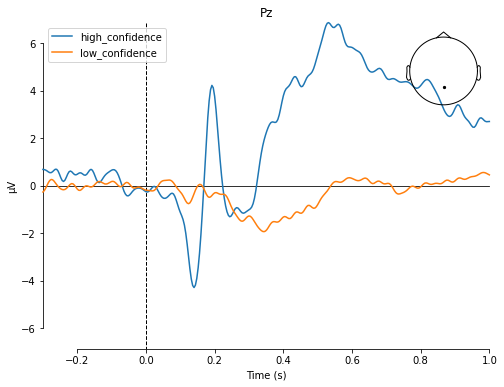

>>> Loading TaskstimulusEpochsMastoids/6_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/6_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


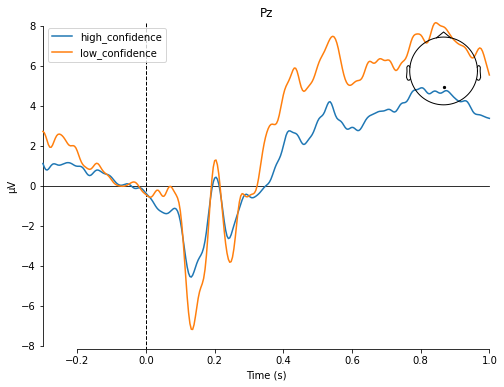

>>> Loading TaskstimulusEpochsMastoids/7_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/7_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


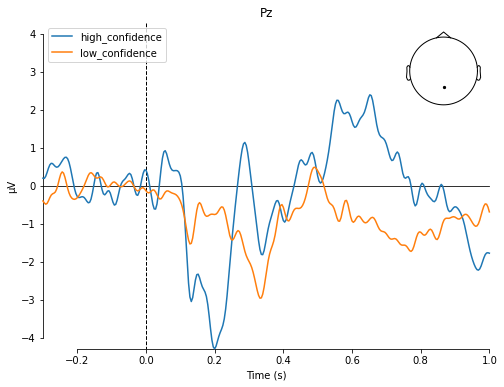

>>> Loading TaskstimulusEpochsMastoids/8_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/8_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


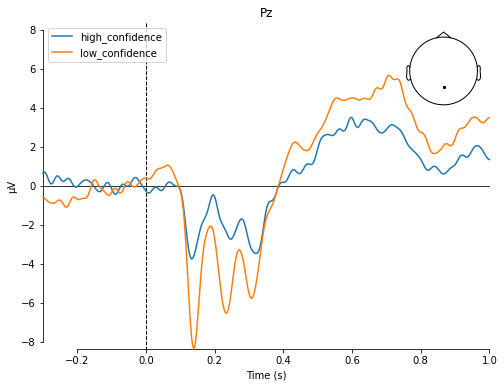

>>> Loading TaskstimulusEpochsMastoids/9_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/9_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


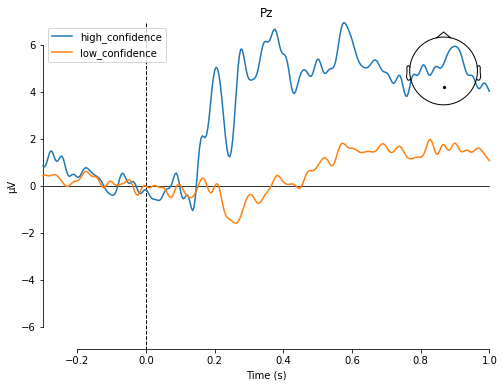

>>> Loading TaskstimulusEpochsMastoids/10_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/10_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


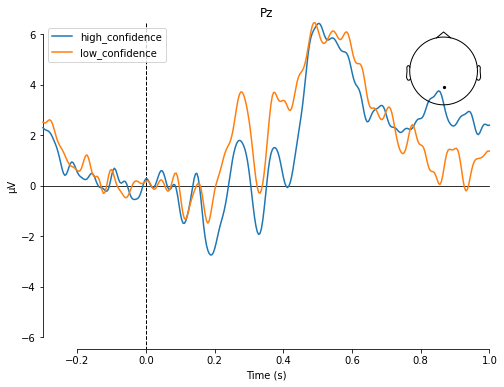

>>> Loading TaskstimulusEpochsMastoids/11_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/11_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


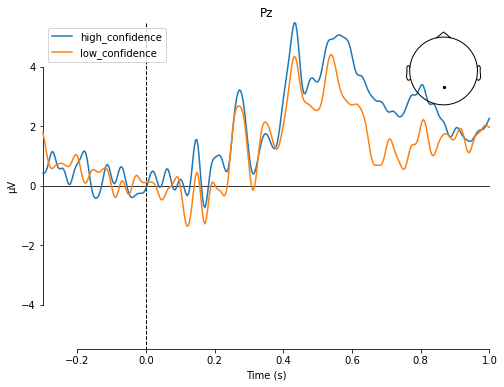

>>> Loading TaskstimulusEpochsMastoids/12_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/12_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


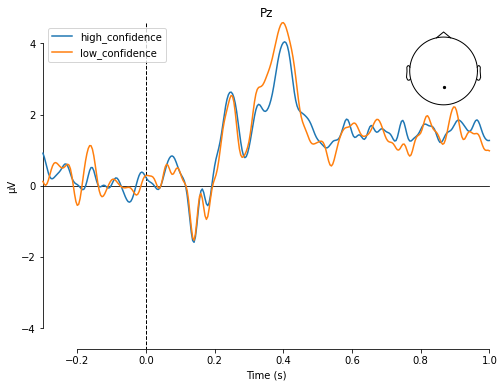

>>> Loading TaskstimulusEpochsMastoids/13_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/13_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


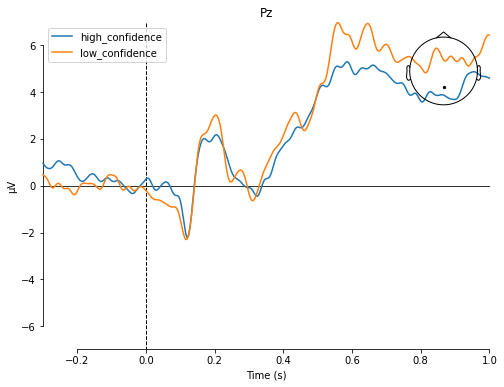

>>> Loading TaskstimulusEpochsMastoids/15_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/15_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


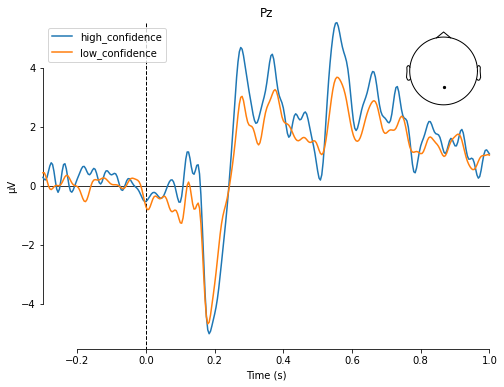

>>> Loading TaskstimulusEpochsMastoids/16_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/16_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


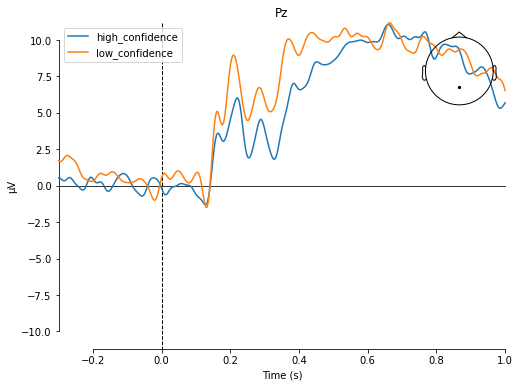

>>> Loading TaskstimulusEpochsMastoids/17_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/17_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


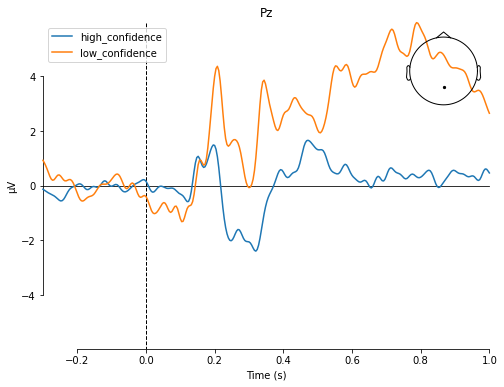

>>> Loading TaskstimulusEpochsMastoids/18_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/18_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


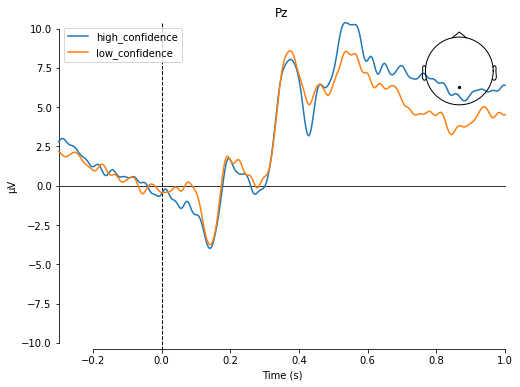

>>> Loading TaskstimulusEpochsMastoids/19_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/19_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


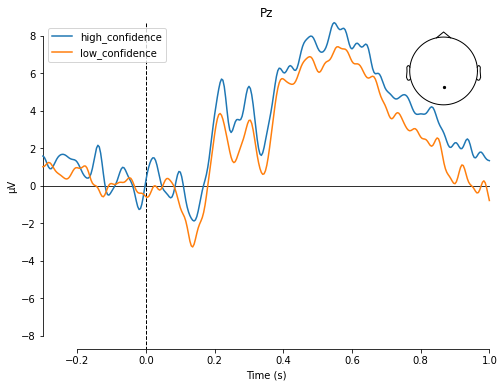

>>> Loading TaskstimulusEpochsMastoids/20_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/20_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


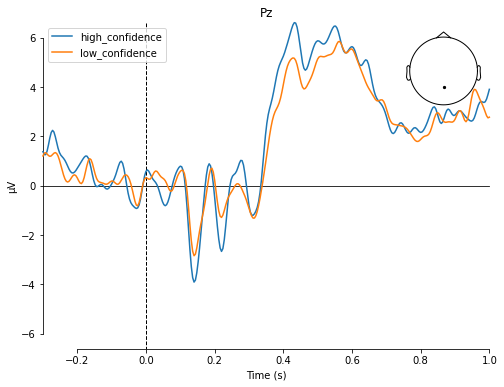

>>> Loading TaskstimulusEpochsMastoids/21_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/21_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:20: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_high_conf = mne.grand_average(grand_average_high_conf)
C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3248172304.py:21: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average_low_conf = mne.grand_average(grand_average_low_conf)


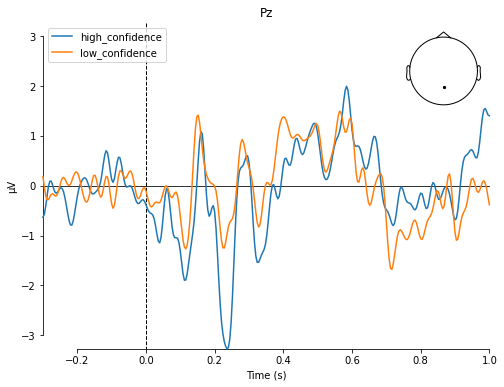

In [8]:
for subject in participant_numbers:   
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    grand_average_high_conf = []
    grand_average_low_conf = []
    
    zscore = lambda x: (x - x.mean()) / x.std()
    epochs.metadata['confidence_z'] = epochs.metadata['participant_confidence'].transform(zscore)

    high_conf_epochs = epochs['confidence_z > 0']
    low_conf_epochs = epochs['confidence_z <= 0']

    grand_average_high_conf.append(high_conf_epochs['participant == %i' % subject].average())
    grand_average_low_conf.append(low_conf_epochs['participant == %i' % subject].average())

    grand_average_high_conf = mne.grand_average(grand_average_high_conf)
    grand_average_low_conf = mne.grand_average(grand_average_low_conf)

    evokeds = dict(high_confidence=grand_average_high_conf,
                   low_confidence=grand_average_low_conf)

    mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)


# Timepointswise Decoding



----------------------- Participant 1 -----------------------


>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28440\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


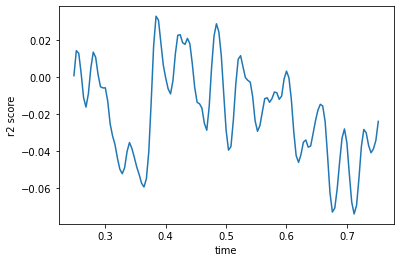

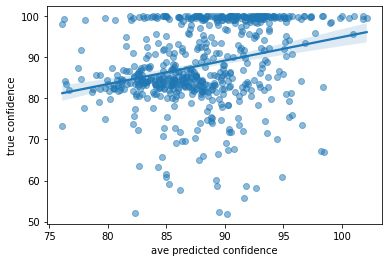



----------------------- Participant 2 -----------------------


>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28440\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


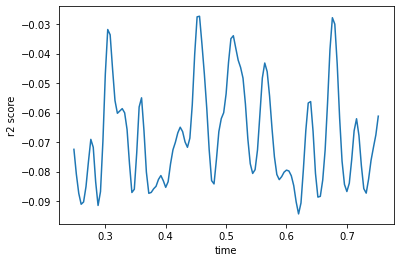

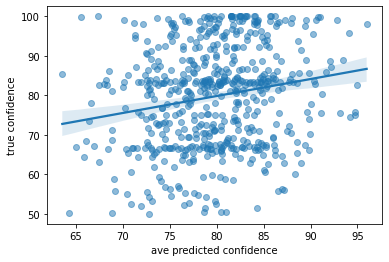



----------------------- Participant 3 -----------------------


>>> Loading TaskstimulusEpochsMastoids/3_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/3_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28440\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


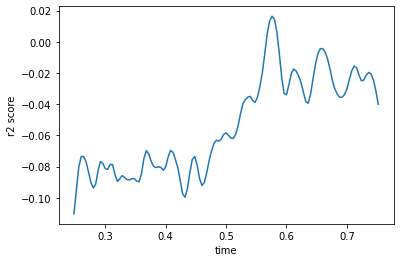

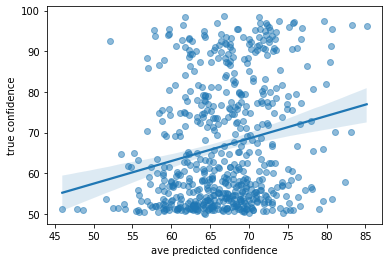



----------------------- Participant 4 -----------------------


>>> Loading TaskstimulusEpochsMastoids/4_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/4_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28440\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


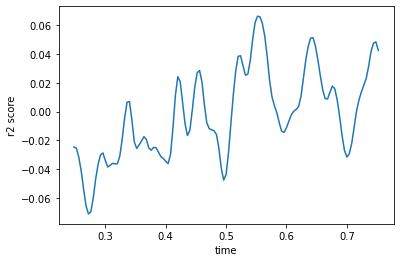

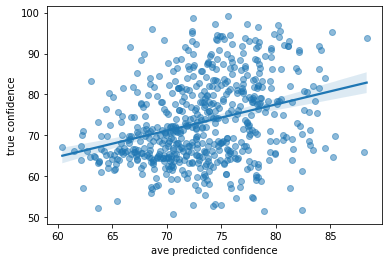



----------------------- Participant 5 -----------------------


>>> Loading TaskstimulusEpochsMastoids/5_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/5_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28440\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


KeyboardInterrupt: 

In [5]:
import sklearn as skl
from sklearn.preprocessing import StandardScaler

accuracy_array_all=[]

for sub in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % sub)
    print('\033[0m')

    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (sub, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    epoch_start = 0.25
    epoch_end = 0.75
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)

    ntrials = len(epochs)
    from copy import deepcopy
    ds = deepcopy(epochs)
    data  = ds.get_data()
    ntrials, nchannels, ntimes = data.shape

    prediction = np.zeros([ntrials, ntimes])*np.nan
    label_pred = np.zeros([ntrials, ntimes])*np.nan
    coefs = np.zeros([ntrials, nchannels, ntimes]) *np.nan

    #we need to reshape the data to channels x time, and demean each channel, then reconcatenate into the trial structure
    data = np.transpose(data, (1,0,2)) #now its channels x trials x times
    data = data.reshape((nchannels, ntrials*ntimes))
    data = np.subtract(data, data.mean(1).reshape(-1,1)) #demean

    data = data.reshape(nchannels, ntrials, ntimes)
    data = np.transpose(data, (1,0,2))
    predictor = epochs.metadata['participant_confidence'].to_numpy()
    

    for tp in range(ntimes):
        #print(tp)
        dat = data[:,:,tp]
        cv = skl.model_selection.LeaveOneOut()

        for train_index, test_index in cv.split(data, predictor):
            x_train, x_test = dat[train_index, :], dat[test_index, :] #get training and test data
            y_train, y_test = predictor[train_index], predictor[test_index] #get training and test predict data

            x_test = x_test.reshape(1,-1) #just needed if leave one out so the scaler works

            scaler = StandardScaler().fit(x_train)
            x_train = scaler.transform(x_train)
            x_test  = scaler.transform(x_test)

            clf = skl.linear_model.Ridge()

            clf.fit(x_train, y_train)

            #prediction[test_index,:,tp] = clf.predict_proba(x_test) #probability of predicting the two classes on these trials, at this time point
            label_pred[test_index,tp]   = clf.predict(x_test)       #the winning prediction for a trial, at this time point
            coefs[test_index,:,tp] = np.squeeze(clf.coef_)
            
#     label_pred
#     epochs.times
#     tmp = label_pred[:,10:50] #select predicted confidence in specific time window
#     tmp.shape
#     tmp.mean(axis=1)
#     plt.figure()
#     sns.regplot(x=tmp.mean(axis=1), y=predictor, scatter_kws={'alpha':0.5})
#     plt.xlabel('ave predicted confidence')
#     plt.ylabel('true confidence')
#     plt.show()
    
    accuracy_overtime = np.zeros(shape = ntimes)
    for tp in range(ntimes):
        acc = skl.metrics.r2_score(predictor, label_pred[:,tp])
        accuracy_overtime[tp] = acc
        
    plt.figure()
    plt.plot(epochs.times, accuracy_overtime)
    plt.xlabel('time'); plt.ylabel('r2 score')
    plt.show()
    
    accuracy_array_all = np.append(accuracy_array_all, accuracy_overtime)
    
    max_r2_index = np.argmax(accuracy_overtime)
    plt.figure()
    sns.regplot(x=label_pred[:, max_r2_index], y=predictor, scatter_kws={'alpha':0.5})
    plt.xlabel('ave predicted confidence')
    plt.ylabel('true confidence')
    plt.show()

In [ ]:
# avrage r2 across participants
# split up by participant (127 timepoints, 20 participants)
sub_arrays = [accuracy_array_all[i:i+127] for i in range(0, len(accuracy_array_all), 127)]

# convert the sub-arrays to a 2D array
sub_array_matrix = np.array(sub_arrays)

# take the mean along axis 0 to get the means of all first, second, third, etc. elements
means = np.mean(sub_array_matrix, axis=0)


plt.figure()
plt.plot(epochs.times, means)
plt.xlabel('time'); plt.ylabel('r2 score')
plt.show()

## Do this separately for non-strategic condition



----------------------- Participant 1 -----------------------


>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


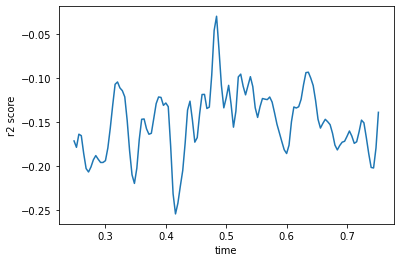

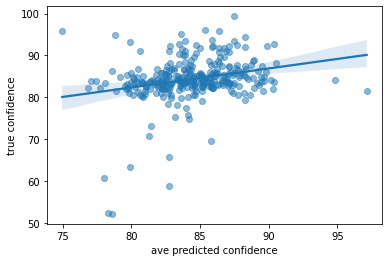



----------------------- Participant 2 -----------------------


>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


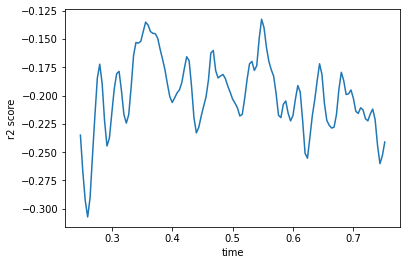

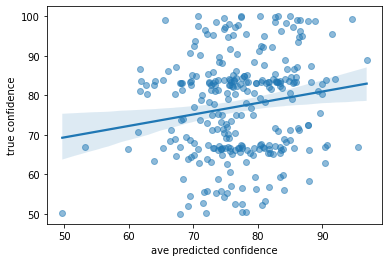



----------------------- Participant 3 -----------------------


>>> Loading TaskstimulusEpochsMastoids/3_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/3_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


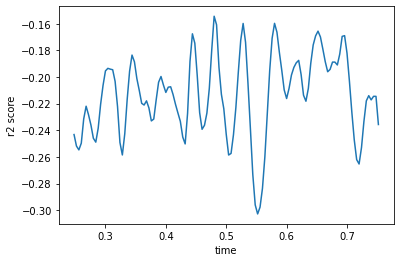

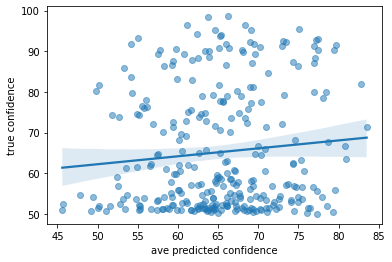



----------------------- Participant 4 -----------------------


>>> Loading TaskstimulusEpochsMastoids/4_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/4_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


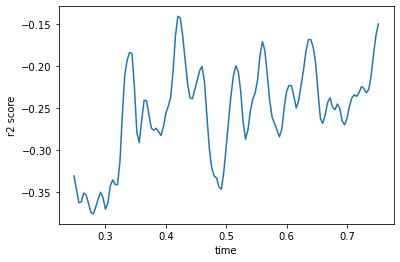

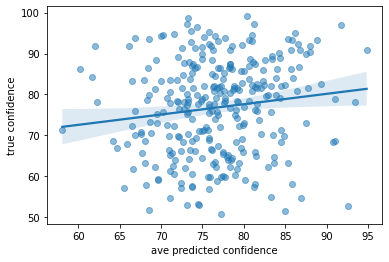



----------------------- Participant 5 -----------------------


>>> Loading TaskstimulusEpochsMastoids/5_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/5_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


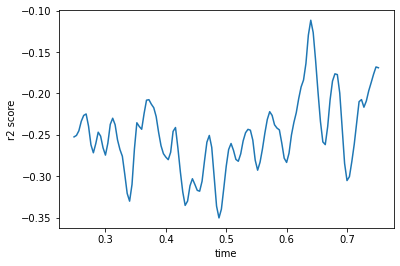

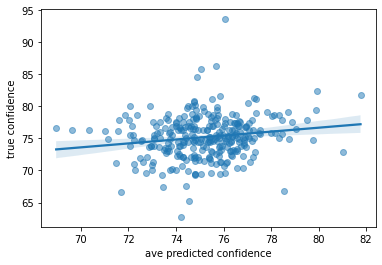



----------------------- Participant 6 -----------------------


>>> Loading TaskstimulusEpochsMastoids/6_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/6_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


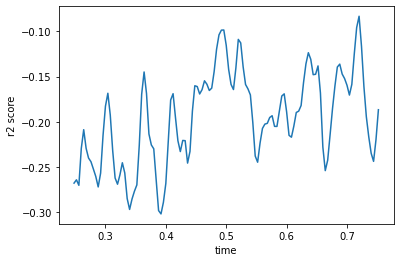

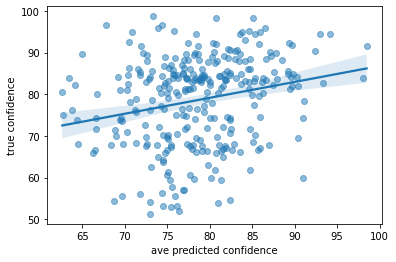



----------------------- Participant 7 -----------------------


>>> Loading TaskstimulusEpochsMastoids/7_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/7_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


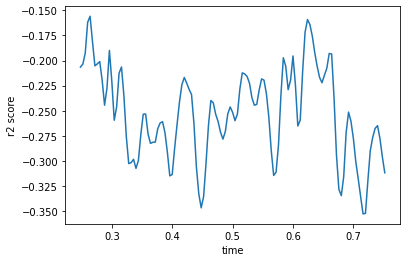

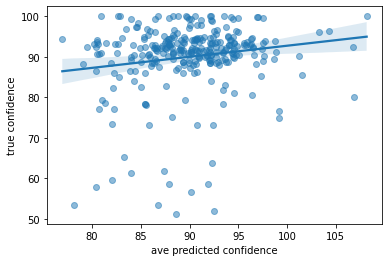



----------------------- Participant 8 -----------------------


>>> Loading TaskstimulusEpochsMastoids/8_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/8_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


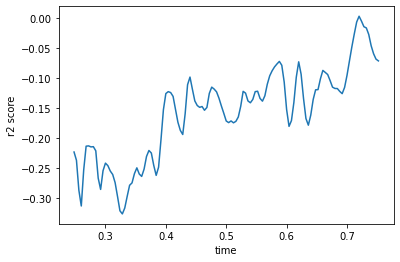

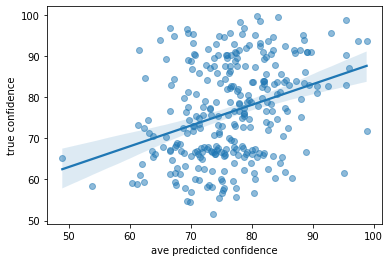



----------------------- Participant 9 -----------------------


>>> Loading TaskstimulusEpochsMastoids/9_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/9_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


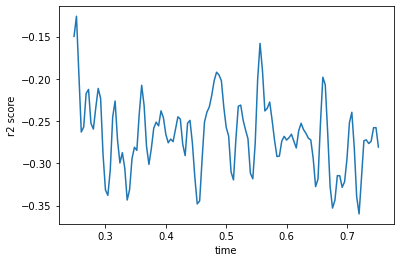

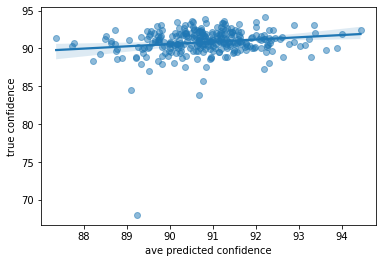



----------------------- Participant 10 -----------------------


>>> Loading TaskstimulusEpochsMastoids/10_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/10_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


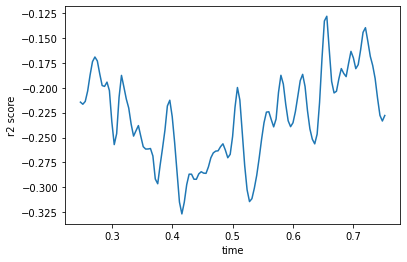

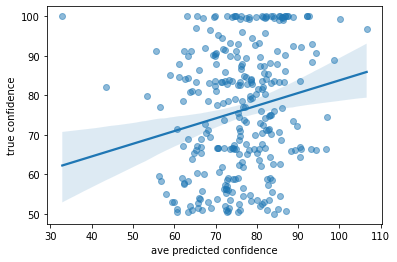



----------------------- Participant 11 -----------------------


>>> Loading TaskstimulusEpochsMastoids/11_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/11_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


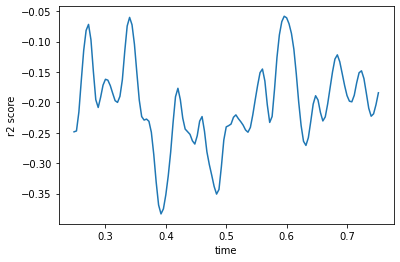

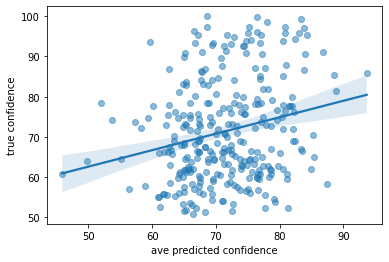



----------------------- Participant 12 -----------------------


>>> Loading TaskstimulusEpochsMastoids/12_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/12_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


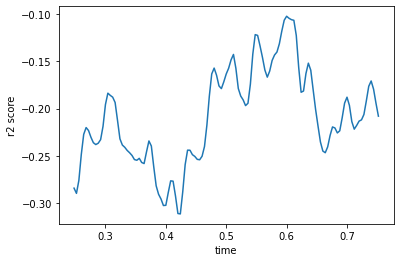

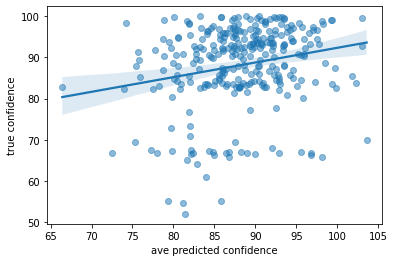



----------------------- Participant 13 -----------------------


>>> Loading TaskstimulusEpochsMastoids/13_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/13_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


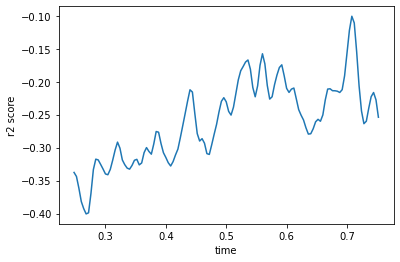

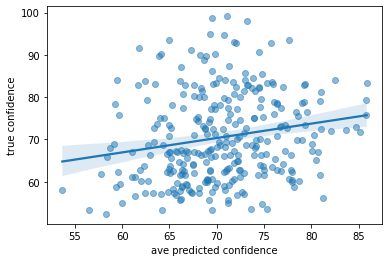



----------------------- Participant 15 -----------------------


>>> Loading TaskstimulusEpochsMastoids/15_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/15_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


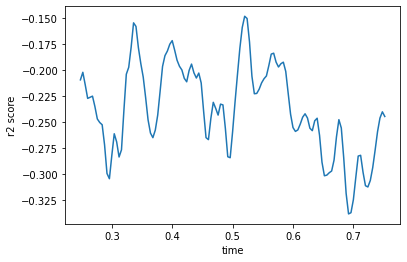

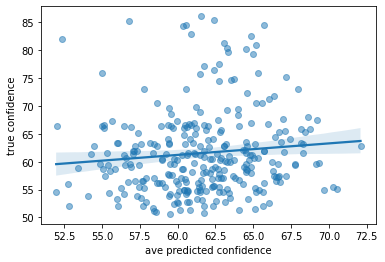



----------------------- Participant 16 -----------------------


>>> Loading TaskstimulusEpochsMastoids/16_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/16_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


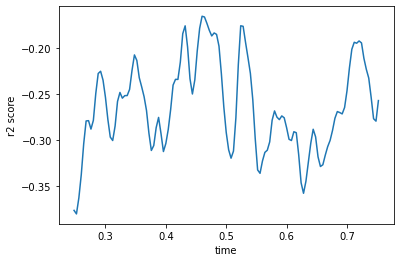

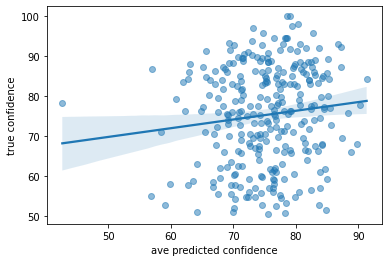



----------------------- Participant 17 -----------------------


>>> Loading TaskstimulusEpochsMastoids/17_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/17_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


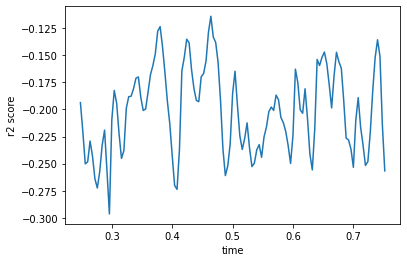

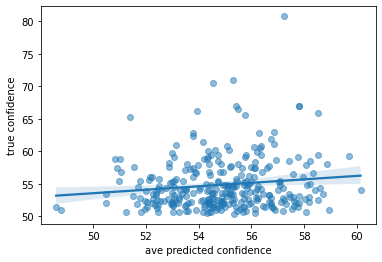



----------------------- Participant 18 -----------------------


>>> Loading TaskstimulusEpochsMastoids/18_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/18_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


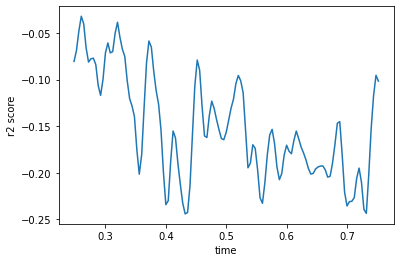

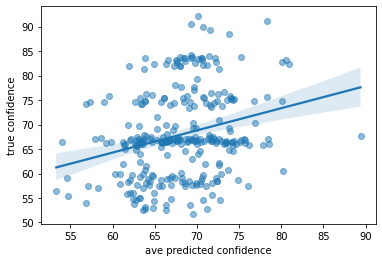



----------------------- Participant 19 -----------------------


>>> Loading TaskstimulusEpochsMastoids/19_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/19_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


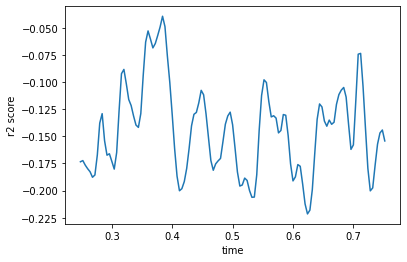

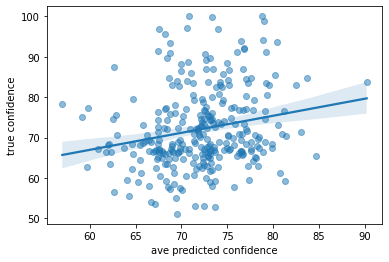



----------------------- Participant 20 -----------------------


>>> Loading TaskstimulusEpochsMastoids/20_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/20_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


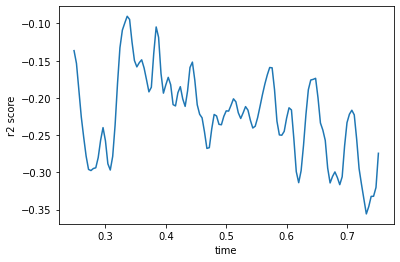

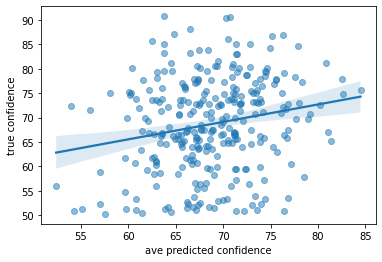



----------------------- Participant 21 -----------------------


>>> Loading TaskstimulusEpochsMastoids/21_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/21_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


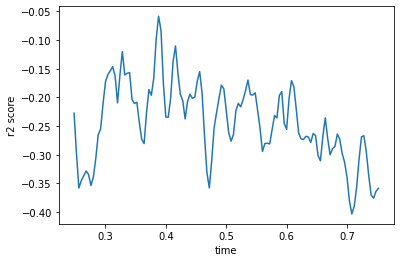

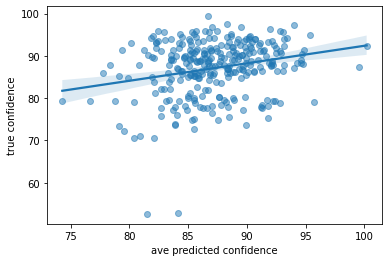

In [16]:
import sklearn as skl
from sklearn.preprocessing import StandardScaler

accuracy_array=[]

for sub in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % sub)
    print('\033[0m')

    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (sub, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    epoch_start = 0.25
    epoch_end = 0.75
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    condition = 'ns'
    epochs = epochs['condition == "%s"' %  condition]

    ntrials = len(epochs)
    from copy import deepcopy
    ds = deepcopy(epochs)
    data  = ds.get_data()
    ntrials, nchannels, ntimes = data.shape

    prediction = np.zeros([ntrials, ntimes])*np.nan
    label_pred = np.zeros([ntrials, ntimes])*np.nan
    coefs = np.zeros([ntrials, nchannels, ntimes]) *np.nan

    #we need to reshape the data to channels x time, and demean each channel, then reconcatenate into the trial structure
    data = np.transpose(data, (1,0,2)) #now its channels x trials x times
    data = data.reshape((nchannels, ntrials*ntimes))
    data = np.subtract(data, data.mean(1).reshape(-1,1)) #demean

    data = data.reshape(nchannels, ntrials, ntimes)
    data = np.transpose(data, (1,0,2))
    predictor = epochs.metadata['participant_confidence'].to_numpy()
    

    for tp in range(ntimes):
        #print(tp)
        dat = data[:,:,tp]
        cv = skl.model_selection.LeaveOneOut()

        for train_index, test_index in cv.split(data, predictor):
            x_train, x_test = dat[train_index, :], dat[test_index, :] #get training and test data
            y_train, y_test = predictor[train_index], predictor[test_index] #get training and test predict data

            x_test = x_test.reshape(1,-1) #just needed if leave one out so the scaler works

            scaler = StandardScaler().fit(x_train)
            x_train = scaler.transform(x_train)
            x_test  = scaler.transform(x_test)

            clf = skl.linear_model.Ridge()

            clf.fit(x_train, y_train)

            #prediction[test_index,:,tp] = clf.predict_proba(x_test) #probability of predicting the two classes on these trials, at this time point
            label_pred[test_index,tp]   = clf.predict(x_test)       #the winning prediction for a trial, at this time point
            coefs[test_index,:,tp] = np.squeeze(clf.coef_)
            
#     label_pred
#     epochs.times
#     tmp = label_pred[:,10:50] #select predicted confidence in specific time window
#     tmp.shape
#     tmp.mean(axis=1)
#     plt.figure()
#     sns.regplot(x=tmp.mean(axis=1), y=predictor, scatter_kws={'alpha':0.5})
#     plt.xlabel('ave predicted confidence')
#     plt.ylabel('true confidence')
#     plt.show()
    
    accuracy_overtime = np.zeros(shape = ntimes)
    for tp in range(ntimes):
        acc = skl.metrics.r2_score(predictor, label_pred[:,tp])
        accuracy_overtime[tp] = acc
        
    plt.figure()
    plt.plot(epochs.times, accuracy_overtime)
    plt.xlabel('time'); plt.ylabel('r2 score')
    plt.show()
    
    accuracy_array.append(accuracy_overtime)
    
    
    max_r2_index = np.argmax(accuracy_overtime)
    plt.figure()
    sns.regplot(x=label_pred[:, max_r2_index], y=predictor, scatter_kws={'alpha':0.5})
    plt.xlabel('ave predicted confidence')
    plt.ylabel('true confidence')
    plt.show()
    
    
    

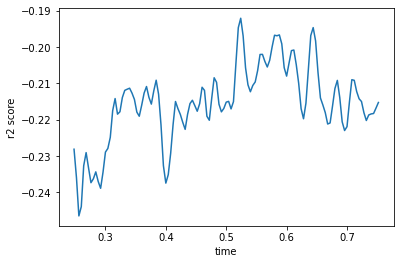

In [40]:
# avrage r2 across participants
# take the mean along axis 0 to get the means of all first, second, third, etc. elements
means = np.mean(accuracy_array, axis=0)

plt.figure()
plt.plot(epochs.times, means)
plt.xlabel('time'); plt.ylabel('r2 score')
plt.show()

## Logistic regression for confidence above / below median (still only non-strategic condition)



----------------------- Participant 1 -----------------------


>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


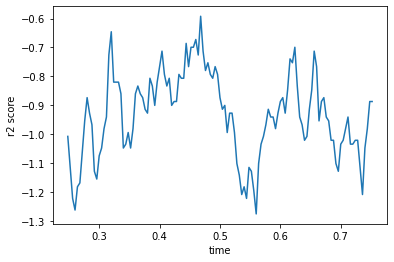

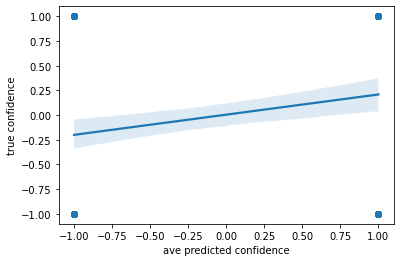



----------------------- Participant 2 -----------------------


>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


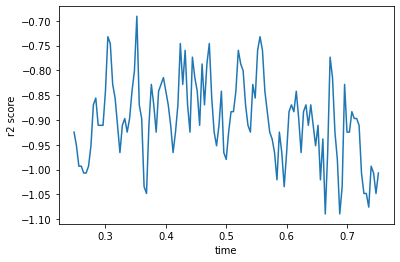

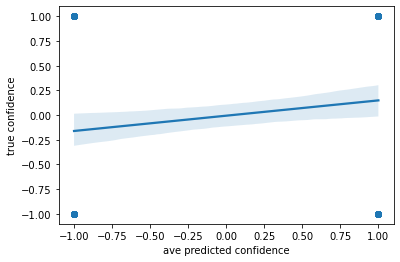



----------------------- Participant 3 -----------------------


>>> Loading TaskstimulusEpochsMastoids/3_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/3_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


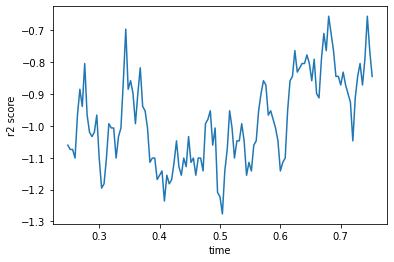

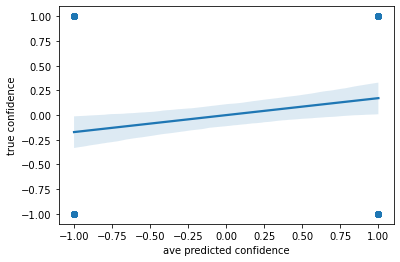



----------------------- Participant 4 -----------------------


>>> Loading TaskstimulusEpochsMastoids/4_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/4_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


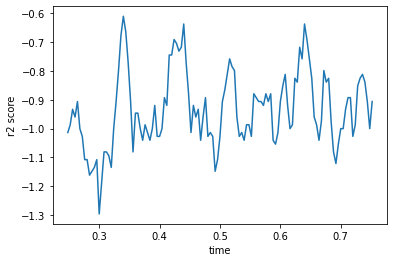

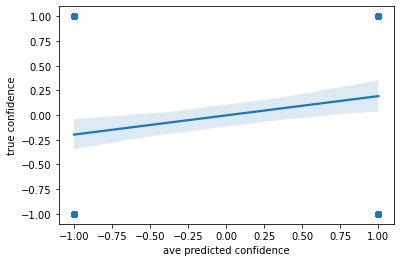



----------------------- Participant 5 -----------------------


>>> Loading TaskstimulusEpochsMastoids/5_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/5_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


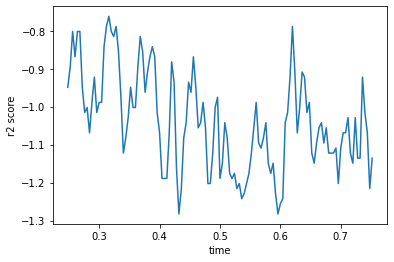

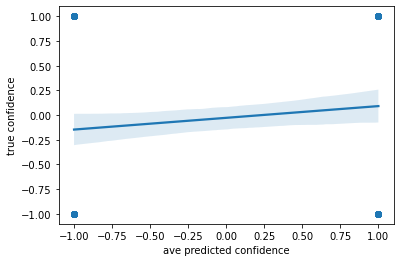



----------------------- Participant 6 -----------------------


>>> Loading TaskstimulusEpochsMastoids/6_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/6_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


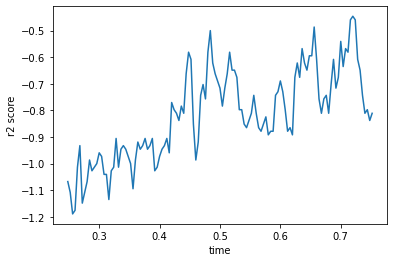

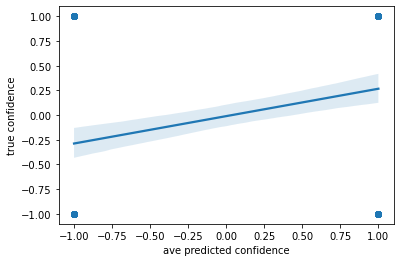



----------------------- Participant 7 -----------------------


>>> Loading TaskstimulusEpochsMastoids/7_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/7_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


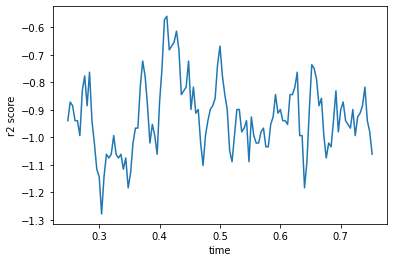

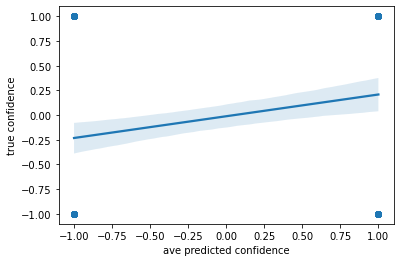



----------------------- Participant 8 -----------------------


>>> Loading TaskstimulusEpochsMastoids/8_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/8_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


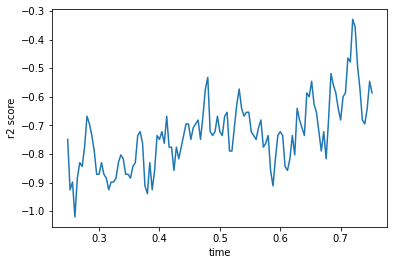

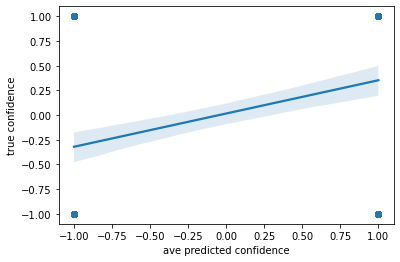



----------------------- Participant 9 -----------------------


>>> Loading TaskstimulusEpochsMastoids/9_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/9_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


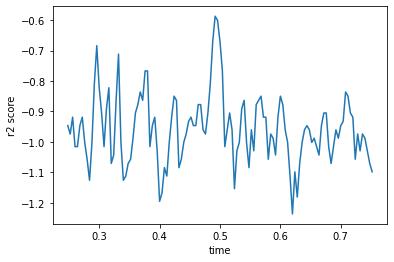

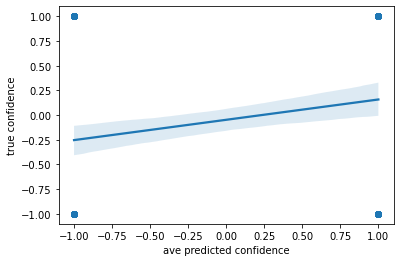



----------------------- Participant 10 -----------------------


>>> Loading TaskstimulusEpochsMastoids/10_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/10_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


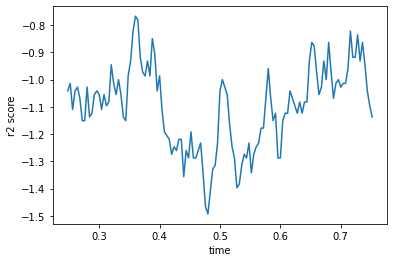

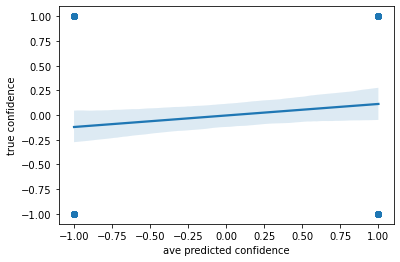



----------------------- Participant 11 -----------------------


>>> Loading TaskstimulusEpochsMastoids/11_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/11_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


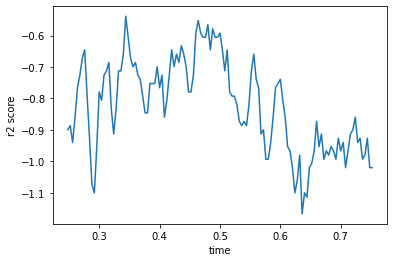

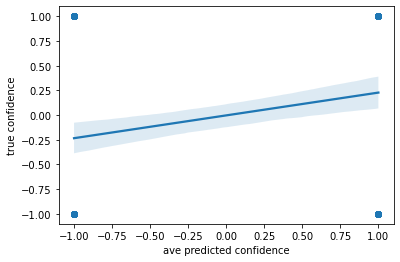



----------------------- Participant 12 -----------------------


>>> Loading TaskstimulusEpochsMastoids/12_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/12_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


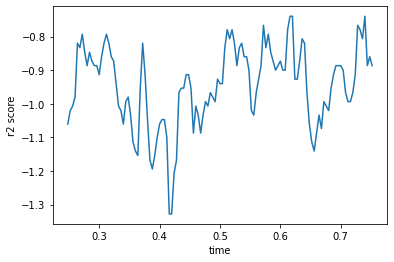

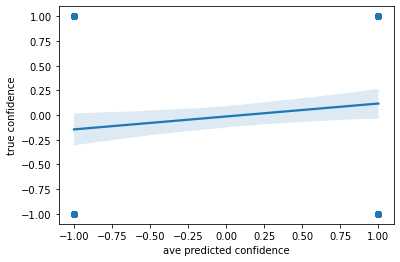



----------------------- Participant 13 -----------------------


>>> Loading TaskstimulusEpochsMastoids/13_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/13_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


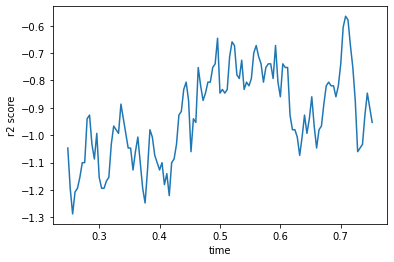

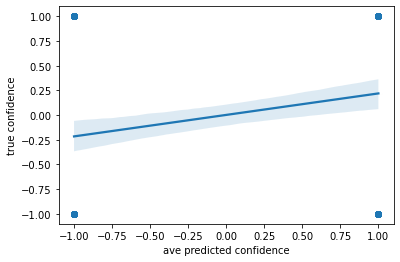



----------------------- Participant 15 -----------------------


>>> Loading TaskstimulusEpochsMastoids/15_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/15_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


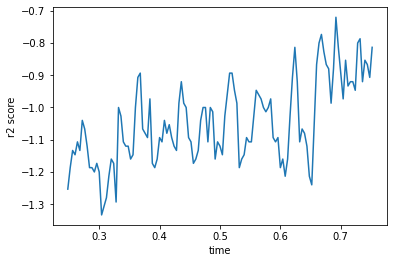

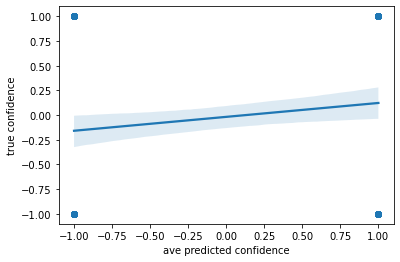



----------------------- Participant 16 -----------------------


>>> Loading TaskstimulusEpochsMastoids/16_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/16_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


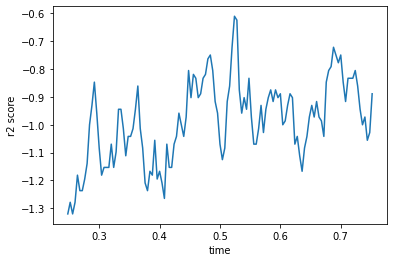

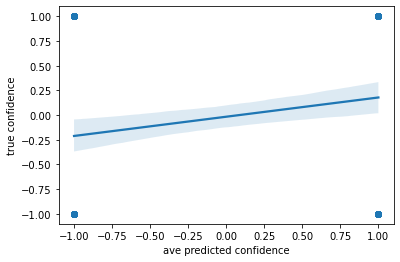



----------------------- Participant 17 -----------------------


>>> Loading TaskstimulusEpochsMastoids/17_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/17_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


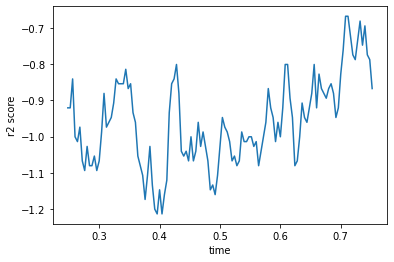

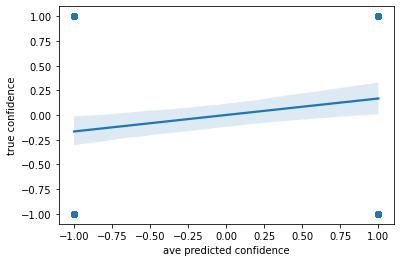



----------------------- Participant 18 -----------------------


>>> Loading TaskstimulusEpochsMastoids/18_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/18_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


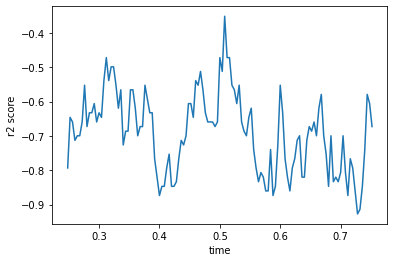

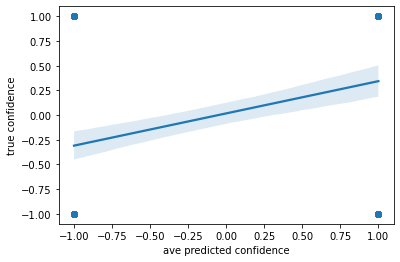



----------------------- Participant 19 -----------------------


>>> Loading TaskstimulusEpochsMastoids/19_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/19_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


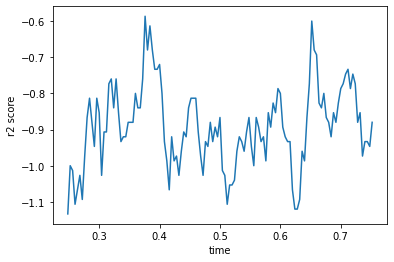

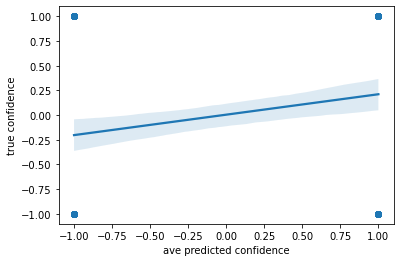



----------------------- Participant 20 -----------------------


>>> Loading TaskstimulusEpochsMastoids/20_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/20_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


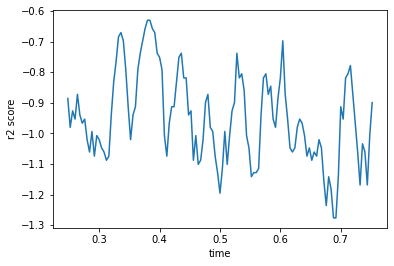

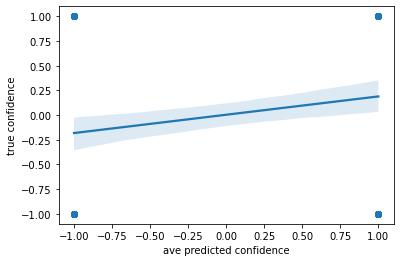



----------------------- Participant 21 -----------------------


>>> Loading TaskstimulusEpochsMastoids/21_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/21_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


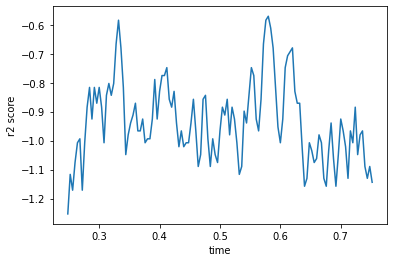

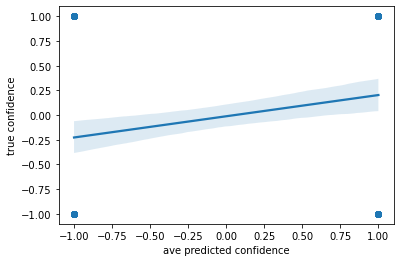

In [42]:
import sklearn as skl
from sklearn.preprocessing import StandardScaler

accuracy_array=[]

for sub in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % sub)
    print('\033[0m')

    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (sub, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    epoch_start = 0.25
    epoch_end = 0.75
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    condition = 'ns'
    epochs = epochs['condition == "%s"' %  condition]

    ntrials = len(epochs)
    from copy import deepcopy
    ds = deepcopy(epochs)
    data  = ds.get_data()
    ntrials, nchannels, ntimes = data.shape

    prediction = np.zeros([ntrials, ntimes])*np.nan
    label_pred = np.zeros([ntrials, ntimes])*np.nan
    coefs = np.zeros([ntrials, nchannels, ntimes]) *np.nan

    #we need to reshape the data to channels x time, and demean each channel, then reconcatenate into the trial structure
    data = np.transpose(data, (1,0,2)) #now its channels x trials x times
    data = data.reshape((nchannels, ntrials*ntimes))
    data = np.subtract(data, data.mean(1).reshape(-1,1)) #demean

    data = data.reshape(nchannels, ntrials, ntimes)
    data = np.transpose(data, (1,0,2))
    predictor = epochs.metadata['participant_confidence'].to_numpy()
    # make it binary
    med_y = np.median(predictor)
    predictor[predictor<=med_y] = -1
    predictor[predictor>med_y] = 1
    

    for tp in range(ntimes):
        #print(tp)
        dat = data[:,:,tp]
        cv = skl.model_selection.LeaveOneOut()

        for train_index, test_index in cv.split(data, predictor):
            x_train, x_test = dat[train_index, :], dat[test_index, :] #get training and test data
            y_train, y_test = predictor[train_index], predictor[test_index] #get training and test predict data

            x_test = x_test.reshape(1,-1) #just needed if leave one out so the scaler works

            scaler = StandardScaler().fit(x_train)
            x_train = scaler.transform(x_train)
            x_test  = scaler.transform(x_test)

            clf = skl.linear_model.RidgeClassifier()

            clf.fit(x_train, y_train)

            #prediction[test_index,:,tp] = clf.predict_proba(x_test) #probability of predicting the two classes on these trials, at this time point
            label_pred[test_index,tp]   = clf.predict(x_test)       #the winning prediction for a trial, at this time point
            coefs[test_index,:,tp] = np.squeeze(clf.coef_)
            
#     label_pred
#     epochs.times
#     tmp = label_pred[:,10:50] #select predicted confidence in specific time window
#     tmp.shape
#     tmp.mean(axis=1)
#     plt.figure()
#     sns.regplot(x=tmp.mean(axis=1), y=predictor, scatter_kws={'alpha':0.5})
#     plt.xlabel('ave predicted confidence')
#     plt.ylabel('true confidence')
#     plt.show()
    
    accuracy_overtime = np.zeros(shape = ntimes)
    for tp in range(ntimes):
        acc = skl.metrics.r2_score(predictor, label_pred[:,tp])
        accuracy_overtime[tp] = acc
        
    plt.figure()
    plt.plot(epochs.times, accuracy_overtime)
    plt.xlabel('time'); plt.ylabel('r2 score')
    plt.show()
    
    accuracy_array.append(accuracy_overtime)
    
    
    max_r2_index = np.argmax(accuracy_overtime)
    plt.figure()
    sns.regplot(x=label_pred[:, max_r2_index], y=predictor, scatter_kws={'alpha':0.5})
    plt.xlabel('ave predicted confidence')
    plt.ylabel('true confidence')
    plt.show()
    
    
    

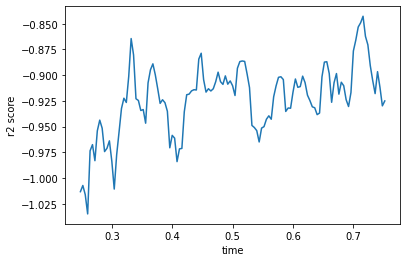

In [43]:
# avrage r2 across participants
# take the mean along axis 0 to get the means of all first, second, third, etc. elements
means = np.mean(accuracy_array, axis=0)

plt.figure()
plt.plot(epochs.times, means)
plt.xlabel('time'); plt.ylabel('r2 score')
plt.show()

## Logistic regression to predict partner condition (non-stratgic only) 



----------------------- Participant 1 -----------------------


>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


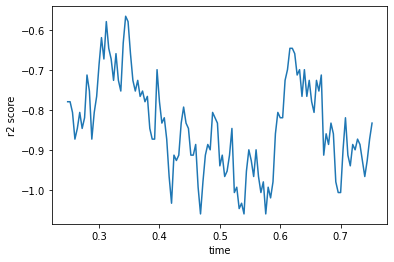

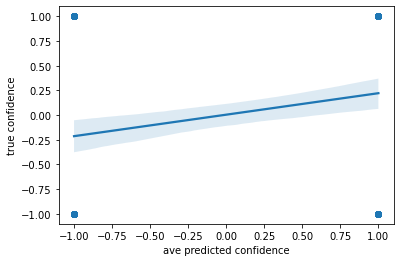



----------------------- Participant 2 -----------------------


>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_28980\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 299 but corresponding boolean dimension is 291

In [54]:
import sklearn as skl
from sklearn.preprocessing import StandardScaler

accuracy_array=[]

for sub in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % sub)
    print('\033[0m')

    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (sub, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    epoch_start = 0.25
    epoch_end = 0.75
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    condition = 'ns'
    epochs = epochs['condition == "%s"' %  condition]

    ntrials = len(epochs)
    from copy import deepcopy
    ds = deepcopy(epochs)
    data  = ds.get_data()
    ntrials, nchannels, ntimes = data.shape

    prediction = np.zeros([ntrials, ntimes])*np.nan
    label_pred = np.zeros([ntrials, ntimes])*np.nan
    coefs = np.zeros([ntrials, nchannels, ntimes]) *np.nan

    #we need to reshape the data to channels x time, and demean each channel, then reconcatenate into the trial structure
    data = np.transpose(data, (1,0,2)) #now its channels x trials x times
    data = data.reshape((nchannels, ntrials*ntimes))
    data = np.subtract(data, data.mean(1).reshape(-1,1)) #demean

    data = data.reshape(nchannels, ntrials, ntimes)
    data = np.transpose(data, (1,0,2))
    
    partner = epochs.metadata['partner'].to_numpy()
    predictor[partner=='underconfident']= float(-1)
    predictor[partner=='overconfident']= float(1)
    

    for tp in range(ntimes):
        #print(tp)
        dat = data[:,:,tp]
        cv = skl.model_selection.LeaveOneOut()

        for train_index, test_index in cv.split(data, predictor):
            x_train, x_test = dat[train_index, :], dat[test_index, :] #get training and test data
            y_train, y_test = predictor[train_index], predictor[test_index] #get training and test predict data

            x_test = x_test.reshape(1,-1) #just needed if leave one out so the scaler works

            scaler = StandardScaler().fit(x_train)
            x_train = scaler.transform(x_train)
            x_test  = scaler.transform(x_test)

            clf = skl.linear_model.RidgeClassifier()

            clf.fit(x_train, y_train)

            #prediction[test_index,:,tp] = clf.predict_proba(x_test) #probability of predicting the two classes on these trials, at this time point
            label_pred[test_index,tp]   = clf.predict(x_test)       #the winning prediction for a trial, at this time point
            coefs[test_index,:,tp] = np.squeeze(clf.coef_)
            
#     label_pred
#     epochs.times
#     tmp = label_pred[:,10:50] #select predicted confidence in specific time window
#     tmp.shape
#     tmp.mean(axis=1)
#     plt.figure()
#     sns.regplot(x=tmp.mean(axis=1), y=predictor, scatter_kws={'alpha':0.5})
#     plt.xlabel('ave predicted confidence')
#     plt.ylabel('true confidence')
#     plt.show()
    
    accuracy_overtime = np.zeros(shape = ntimes)
    for tp in range(ntimes):
        acc = skl.metrics.r2_score(predictor, label_pred[:,tp])
        accuracy_overtime[tp] = acc
        
    plt.figure()
    plt.plot(epochs.times, accuracy_overtime)
    plt.xlabel('time'); plt.ylabel('r2 score')
    plt.show()
    
    accuracy_array.append(accuracy_overtime)
    
    
    max_r2_index = np.argmax(accuracy_overtime)
    plt.figure()
    sns.regplot(x=label_pred[:, max_r2_index], y=predictor, scatter_kws={'alpha':0.5})
    plt.xlabel('ave predicted confidence')
    plt.ylabel('true confidence')
    plt.show()
    
    
    

In [ ]:
# avrage r2 across participants
# take the mean along axis 0 to get the means of all first, second, third, etc. elements
means = np.mean(accuracy_array, axis=0)

plt.figure()
plt.plot(epochs.times, means)
plt.xlabel('time'); plt.ylabel('r2 score')
plt.show()

# Across timepoints stuff

## Linear regression predicting confidence 

In [20]:
#%%capture

all_lr_scores = []

for subject in participant_numbers:   
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    #epochs.filter(l_freq=None, h_freq=40)
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    # independent variables
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    X = epochs.get_data()
    
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    
    # collapse across trials and timepoints
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels)
    X = X.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    # extend from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y = np.repeat(y, n_timepoints)
    
    # fit regression
    reg = LinearRegression().fit(X, y)
    score = reg.score(X, y)
#     print(score)
    
#     # regression betas
#     betas = reg.coef_
#     #print(betas)
    
#     mne.viz.plot_topomap(data=betas, pos=epochs.info)

    all_lr_scores.append(score)




----------------------- Participant 1 -----------------------


>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 2 -----------------------


>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 3 -----------------------


>>> Loading TaskstimulusEpochsMastoids/3_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/3_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 4 -----------------------


>>> Loading TaskstimulusEpochsMastoids/4_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/4_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 5 -----------------------


>>> Loading TaskstimulusEpochsMastoids/5_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/5_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 6 -----------------------


>>> Loading TaskstimulusEpochsMastoids/6_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/6_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 7 -----------------------


>>> Loading TaskstimulusEpochsMastoids/7_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/7_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 8 -----------------------


>>> Loading TaskstimulusEpochsMastoids/8_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/8_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 9 -----------------------


>>> Loading TaskstimulusEpochsMastoids/9_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/9_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 10 -----------------------


>>> Loading TaskstimulusEpochsMastoids/10_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/10_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 11 -----------------------


>>> Loading TaskstimulusEpochsMastoids/11_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/11_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 12 -----------------------


>>> Loading TaskstimulusEpochsMastoids/12_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/12_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 13 -----------------------


>>> Loading TaskstimulusEpochsMastoids/13_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/13_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 15 -----------------------


>>> Loading TaskstimulusEpochsMastoids/15_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/15_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 16 -----------------------


>>> Loading TaskstimulusEpochsMastoids/16_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/16_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 17 -----------------------


>>> Loading TaskstimulusEpochsMastoids/17_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/17_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 18 -----------------------


>>> Loading TaskstimulusEpochsMastoids/18_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/18_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 19 -----------------------


>>> Loading TaskstimulusEpochsMastoids/19_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/19_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 20 -----------------------


>>> Loading TaskstimulusEpochsMastoids/20_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/20_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)




----------------------- Participant 21 -----------------------


>>> Loading TaskstimulusEpochsMastoids/21_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/21_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_32640\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


In [21]:

print('Average R-squared linear regression: %f' % (sum(all_lr_scores) / len(all_lr_scores),))


Average R-squared linear regression: 0.111922


## Cross-validation random split across timepoints

In [ ]:
all_cv_scores = []

for subject in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    
    
    ###### INDEPENDENT VARIABLES
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times) (600, 64, 127) (250 Hz --> every 4 ms)
    X = epochs.get_data()
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels)

    
    
    ###### DEPENDENT VARIABLES
    ## this version is splitting data randomly by timepoints - topoplots etc look v similar
    # 50% training data, 50% test data
    X = X.reshape(-1, n_channels)
    y = epochs.metadata['participant_confidence'].to_numpy()
    y = np.repeat(y, n_timepoints)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
    

    
    ###### TRAIN CLASSIFIER
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm

    # regression betas
    betas = regressor.coef_
    
    # predict y from X_test
    y_pred = regressor.predict(X_test)    
    
    
    ###### PLOT
    # plot topoplot with beta weights
    mne.viz.plot_topomap(data=betas, pos=epochs.info)
    print("Beta weights for each channel \n\n")

    # plot topoplot with sensor projections
    # get out sensor projections (see Parra et al paper )
    y = y_pred
    x = X_test
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")

    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show();
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")
    
#     # plot normal ERP over time
#     across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
#     average_across_epochs_erp = across_epochs_erp.mean(axis=0) # compute the average across electrodes 
#     x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
#     plt.plot(x_axis, average_across_epochs_erp)
#     plt.show()
#     print("Average ERP (not weighted) \n\n")

    
    print('R-squared:', r2_score(y_test, y_pred))  
    all_cv_scores.append(r2_score(y_test, y_pred))
    
    

In [ ]:

print('Average R-squared cross validation random timepoint split: %f' % (sum(all_cv_scores) / len(all_cv_scores),))


## Cross-validation training on odd (even) trials, testing on even (odd) trials

In [ ]:
all_scores_test = []
all_scores_test_trialwise = []
all_scores_train = []
all_scores_train_trialwise = []


for subject in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    
    ######################################################################
    ####################### INDEPENDENT VARIABLE ######################### 
    ######################################################################
    
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times) (600, 64, 127) (250 Hz --> every 4 ms)
    X = epochs.get_data()
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels) (600, 127, 64)
    
    # divide into odd and even trials (3D array) (300, 127, 64)
    X_odd_trials = X[1::2, :, :] # select every second epoch (start:stop:step, :, :)
    X_even_trials = X[0::2, :, :] # select every other second epoch
    
    # collapse across trials and timepoints (2D array) (triple checked this and it is correctly sorted as e1t1, e1t2, e1t3, ...)
    X_odd_per_timepoint = X_odd_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features
    X_even_per_timepoint = X_even_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    
    ######################################################################
    ######################## DEPENDENT VARIABLE ########################## 
    ######################################################################
    
    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    
    # divide into odd and even trials
    y_odd_trials = y[1::2]
    y_even_trials = y[0::2]
    
    # make from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y_odd_per_timepoint = np.repeat(y_odd_trials, n_timepoints)
    y_even_per_timepoint = np.repeat(y_even_trials, n_timepoints)
     
    
    ######################################################################
    ####################### TRAINING ON ODD TRIALS ####################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on odd trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_odd_trials
    X_train_per_timepoint = X_odd_per_timepoint
    
    X_test_trials = X_even_trials
    X_test_per_timepoint = X_even_per_timepoint
    
    
    y_train_trials = y_odd_trials
    y_train_per_timepoint = y_odd_per_timepoint
    
    y_test_trials = y_even_trials
    y_test_per_timepoint = y_even_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_   
    intercept = regressor.intercept_
    
    # predict y from X_test 
    # OPTION 1
    # use predict function on individual timepoints
    y_pred_per_timepoint = regressor.predict(X_test_per_timepoint) 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)
    
    # OPTION 2
    # use betas and intercept on individual timepoints   
    y_pred_per_timepoint_2 = np.sum(X_test_per_timepoint * betas, axis=1) + intercept 
    # then average predicted values within an epoch
    epoch_y_pred_2 = np.mean(y_pred_per_timepoint_2.reshape(-1, n_timepoints), axis=1)
    
    # OPTION 3
    # use predict function on epoch average
    epoch_y_pred_3 = regressor.predict(np.mean(X_test_trials, axis=1)) # take mean voltage along n_times axis (n_epochs, n_times, n_channels)
    
    # OPTION 4
    # use betas and intercept on epoch average
    epoch_y_pred_4 = np.sum(np.mean(X_test_trials, axis=1) * betas, axis=1) + intercept 

#     # sanity check - all options give the same predicted y per epoch
#     print(epoch_y_pred_1[0:6])
#     print(epoch_y_pred_2[0:6])
#     print(epoch_y_pred_3[0:6])
#     print(epoch_y_pred_4[0:6])


    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
#     # sanity check - manual computation gives same R-squared
#     actual_minus_predicted = sum((y_test_per_timepoint - y_pred_per_timepoint_1)**2)
#     actual_minus_actual_mean = sum((y_test_per_timepoint - y_test_per_timepoint.mean())**2)
#     r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
#     print('R-squared timepoint data:', r2)
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
#     # sanity check - manual computation gives same R-squared
#     actual_minus_predicted = sum((y_test_trials - epoch_y_pred_1)**2)
#     actual_minus_actual_mean = sum((y_test_trials - y_test_trials.mean())**2)
#     r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
#     print('R-squared trial data:', r2)
    # plot y against predicted y
    sns.regplot(x=y_test_trials, y=epoch_y_pred, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence test data')
    plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    # plot y against predicted y
    sns.regplot(x=y_train_trials, y=epoch_y_pred_train, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence train data')
    plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))
    

    ####################### PLOTTING ####################### 
    
    # plot topoplot with beta weights
    mne.viz.plot_topomap(data=betas, pos=epochs.info)
    print("Beta weights for each channel \n\n")

    
    # plot topoplot with sensor projections (see Parra et al paper for equation)
    y = y_pred_per_timepoint
    x = X_test_per_timepoint
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")
    
#     # sanity check - plotting with trial data rather than timepoint data gives the same plot
#     y = epoch_y_pred
#     x = np.mean(X_test_trials, axis=1) 
#     a =  y.T@x * ( 1 / (y.T@y) )
#     mne.viz.plot_topomap(data=a, pos=epochs.info)
#     print("Sensor projections trial data \n\n")
    
    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show()
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")

    
    
    ######################################################################
    ####################### TRAINING ON EVEN TRIALS ###################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on even trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_even_trials
    X_train_per_timepoint = X_even_per_timepoint
    
    X_test_trials = X_odd_trials
    X_test_per_timepoint = X_odd_per_timepoint
    
    
    y_train_trials = y_even_trials
    y_train_per_timepoint = y_even_per_timepoint
    
    y_test_trials = y_odd_trials
    y_test_per_timepoint = y_odd_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test 
    # use predict function on individual timepoints
    y_pred_per_timepoint = regressor.predict(X_test_per_timepoint) 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
#     # sanity check - manual computation gives same R-squared
#     actual_minus_predicted = sum((y_test_per_timepoint - y_pred_per_timepoint_1)**2)
#     actual_minus_actual_mean = sum((y_test_per_timepoint - y_test_per_timepoint.mean())**2)
#     r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
#     print('R-squared timepoint data:', r2)
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
#     # sanity check - manual computation gives same R-squared
#     actual_minus_predicted = sum((y_test_trials - epoch_y_pred_1)**2)
#     actual_minus_actual_mean = sum((y_test_trials - y_test_trials.mean())**2)
#     r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
#     print('R-squared trial data:', r2)
    # plot y against predicted y
    sns.regplot(x=y_test_trials, y=epoch_y_pred, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence test data')
    plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    # plot y against predicted y
    sns.regplot(x=y_train_trials, y=epoch_y_pred_train, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence train data')
    plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))
    

    ####################### PLOTTING ####################### 
    
    # plot topoplot with beta weights
    mne.viz.plot_topomap(data=betas, pos=epochs.info)
    print("Beta weights for each channel \n\n")
    
    # plot topoplot with sensor projections (see Parra et al paper for equation)
    y = y_pred_per_timepoint
    x = X_test_per_timepoint
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")

#     # shuffle ys --> gives same topoplot because my predictions are basically random and then this just plots the average voltage which happens to look like P3
#     y = y_pred_per_timepoint
#     np.random.shuffle(y)
#     x = X_test_per_timepoint
#     a =  y.T@x * ( 1 / (y.T@y) )
#     mne.viz.plot_topomap(data=a, pos=epochs.info)
#     print("Sensor projections shuffled ys \n\n")
    
#     # shuffle xs --> gives random topoplot
#     y = y_pred_per_timepoint
#     x = X_test_per_timepoint
#     def shuffle_along_axis(a, axis):
#         idx = np.random.rand(*a.shape).argsort(axis=axis)
#         return np.take_along_axis(a,idx,axis=axis)
#     x = shuffle_along_axis(x, 1)
#     a =  y.T@x * ( 1 / (y.T@y) )
#     mne.viz.plot_topomap(data=a, pos=epochs.info)
#     print("Sensor projections shuffled xs \n\n")

    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show()
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")    

    



R-squared timepoint wise

In [ ]:

print('\n Average R-squared test timepoint-wise: %f' % (sum(all_scores_test) / len(all_scores_test),))



In [ ]:

print('\n Average R-squared train timepoint-wise: %f' % (sum(all_scores_train) / len(all_scores_train),))



R-squared trial wise

In [ ]:

print('\n Average R-squared test trialwise: %f' % (sum(all_scores_test_trialwise) / len(all_scores_test_trialwise),))



In [ ]:

print('\n Average R-squared train trialwise: %f' % (sum(all_scores_train_trialwise) / len(all_scores_train_trialwise),))



### Add partner condition as predictor

In [ ]:
all_scores_test = []
all_scores_test_trialwise = []
all_scores_train = []
all_scores_train_trialwise = []


for subject in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    
    ######################################################################
    ####################### INDEPENDENT VARIABLE ######################### 
    ######################################################################
    
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times) (600, 64, 127) (250 Hz --> every 4 ms)
    X = epochs.get_data()
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels) (600, 127, 64)
    
    # divide into odd and even trials (3D array) (300, 127, 64)
    X_odd_trials = X[1::2, :, :] # select every second epoch (start:stop:step, :, :)
    X_even_trials = X[0::2, :, :] # select every other second epoch
    
    # collapse across trials and timepoints (2D array) (triple checked this and it is correctly sorted as e1t1, e1t2, e1t3, ...)
    X_odd_per_timepoint = X_odd_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features
    X_even_per_timepoint = X_even_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    
    # get partner for every trial as a numeric predictor
    partner = epochs.metadata['partner'].to_numpy()
    partner[partner=='underconfident']= -1
    partner[partner=='overconfident']= 1

    # divide into odd and even trials
    partner_odd_trials = partner[1::2]
    partner_even_trials = partner[0::2]

    # make from (n_epochs) to (n_epochs x n_timepoints, ) where partner stays the same
    partner_odd_per_timepoint = np.repeat(partner_odd_trials, n_timepoints)
    partner_even_per_timepoint = np.repeat(partner_even_trials, n_timepoints)
    
    # add partner as a predictor variable
    X_odd_per_timepoint = np.column_stack([X_odd_per_timepoint,partner_odd_per_timepoint])
    X_even_per_timepoint = np.column_stack([X_even_per_timepoint,partner_even_per_timepoint])

    ######################################################################
    ######################## DEPENDENT VARIABLE ########################## 
    ######################################################################
    
    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    
    # divide into odd and even trials
    y_odd_trials = y[1::2]
    y_even_trials = y[0::2]
    
    # make from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y_odd_per_timepoint = np.repeat(y_odd_trials, n_timepoints)
    y_even_per_timepoint = np.repeat(y_even_trials, n_timepoints)
     
    
    ######################################################################
    ####################### TRAINING ON ODD TRIALS ####################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on odd trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_odd_trials
    X_train_per_timepoint = X_odd_per_timepoint
    
    X_test_trials = X_even_trials
    X_test_per_timepoint = X_even_per_timepoint
    
    
    y_train_trials = y_odd_trials
    y_train_per_timepoint = y_odd_per_timepoint
    
    y_test_trials = y_even_trials
    y_test_per_timepoint = y_even_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
        
    intercept = regressor.intercept_
    
    # predict y from X_test 
    # use predict function on individual timepoints
    y_pred_per_timepoint = regressor.predict(X_test_per_timepoint) 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)
    

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
    sns.regplot(x=y_test_trials, y=epoch_y_pred, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence test data')
    plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    # plot y against predicted y
    sns.regplot(x=y_train_trials, y=epoch_y_pred_train, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence train data')
    plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))
    

    ####################### PLOTTING ####################### 
    
    # plot topoplot with beta weights minus partner beta
    betas = betas[:-1]
    mne.viz.plot_topomap(data=betas, pos=epochs.info)
    print("Beta weights for each channel \n\n")

    # plot topoplot with sensor projections (see Parra et al paper for equation)
    y = y_pred_per_timepoint
    x = X_test_per_timepoint[:, :-1]
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")
    
    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show()
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")

    
    
    ######################################################################
    ####################### TRAINING ON EVEN TRIALS ###################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on even trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_even_trials
    X_train_per_timepoint = X_even_per_timepoint
    
    X_test_trials = X_odd_trials
    X_test_per_timepoint = X_odd_per_timepoint
    
    
    y_train_trials = y_even_trials
    y_train_per_timepoint = y_even_per_timepoint
    
    y_test_trials = y_odd_trials
    y_test_per_timepoint = y_odd_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test 
    # use predict function on individual timepoints
    y_pred_per_timepoint = regressor.predict(X_test_per_timepoint) 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
    sns.regplot(x=y_test_trials, y=epoch_y_pred, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence test data')
    plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    # plot y against predicted y
    sns.regplot(x=y_train_trials, y=epoch_y_pred_train, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence train data')
    plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))
    

    ####################### PLOTTING ####################### 

    # plot topoplot with beta weights minus partner beta
    betas = betas[:-1]
    mne.viz.plot_topomap(data=betas , pos=epochs.info)
    print("Beta weights for each channel \n\n")
    
    # plot topoplot with sensor projections (see Parra et al paper for equation) minus partner parameter
    y = y_pred_per_timepoint
    x = X_test_per_timepoint[:, :-1]
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")

    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show()
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")    





In [ ]:
print('\n Average R-squared test timepoint-wise: %f' % (sum(all_scores_test) / len(all_scores_test),))


In [ ]:
print('\n Average R-squared train timepoint-wise: %f' % (sum(all_scores_train) / len(all_scores_train),))


In [ ]:
print('\n Average R-squared test trialwise: %f' % (sum(all_scores_test_trialwise) / len(all_scores_test_trialwise),))


In [ ]:
print('\n Average R-squared train trialwise: %f' % (sum(all_scores_train_trialwise) / len(all_scores_train_trialwise),))


### Add partner and task condition as predictors

In [ ]:
all_scores_test = []
all_scores_test_trialwise = []
all_scores_train = []
all_scores_train_trialwise = []


for subject in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    
    ######################################################################
    ####################### INDEPENDENT VARIABLE ######################### 
    ######################################################################
    
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times) (600, 64, 127) (250 Hz --> every 4 ms)
    X = epochs.get_data()
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels) (600, 127, 64)
    
    # divide into odd and even trials (3D array) (300, 127, 64)
    X_odd_trials = X[1::2, :, :] # select every second epoch (start:stop:step, :, :)
    X_even_trials = X[0::2, :, :] # select every other second epoch
    
    # collapse across trials and timepoints (2D array) (triple checked this and it is correctly sorted as e1t1, e1t2, e1t3, ...)
    X_odd_per_timepoint = X_odd_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features
    X_even_per_timepoint = X_even_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    
    # get partner for every trial as a numeric predictor
    partner = epochs.metadata['partner'].to_numpy()
    partner[partner=='underconfident']= -1
    partner[partner=='overconfident']= 1

    # divide into odd and even trials
    partner_odd_trials = partner[1::2]
    partner_even_trials = partner[0::2]

    # make from (n_epochs) to (n_epochs x n_timepoints, ) where partner stays the same
    partner_odd_per_timepoint = np.repeat(partner_odd_trials, n_timepoints)
    partner_even_per_timepoint = np.repeat(partner_even_trials, n_timepoints)
    
    # add partner as a predictor variable
    X_odd_per_timepoint = np.column_stack([X_odd_per_timepoint,partner_odd_per_timepoint])
    X_even_per_timepoint = np.column_stack([X_even_per_timepoint,partner_even_per_timepoint])
    
    
    # get condition for every trial as a numeric predictor
    condition = epochs.metadata['condition'].to_numpy()
    condition[condition=='ns']= -1
    condition[condition=='s']= 1

    # divide into odd and even trials
    condition_odd_trials = condition[1::2]
    condition_even_trials = condition[0::2]

    # make from (n_epochs) to (n_epochs x n_timepoints, ) where partner stays the same
    condition_odd_per_timepoint = np.repeat(condition_odd_trials, n_timepoints)
    condition_even_per_timepoint = np.repeat(condition_even_trials, n_timepoints)
    
    # add condition as a predictor variable
    X_odd_per_timepoint = np.column_stack([X_odd_per_timepoint,condition_odd_per_timepoint])
    X_even_per_timepoint = np.column_stack([X_even_per_timepoint,condition_even_per_timepoint])

    ######################################################################
    ######################## DEPENDENT VARIABLE ########################## 
    ######################################################################
    
    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    
    # divide into odd and even trials
    y_odd_trials = y[1::2]
    y_even_trials = y[0::2]
    
    # make from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y_odd_per_timepoint = np.repeat(y_odd_trials, n_timepoints)
    y_even_per_timepoint = np.repeat(y_even_trials, n_timepoints)
     
    
    ######################################################################
    ####################### TRAINING ON ODD TRIALS ####################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on odd trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_odd_trials
    X_train_per_timepoint = X_odd_per_timepoint
    
    X_test_trials = X_even_trials
    X_test_per_timepoint = X_even_per_timepoint
    
    
    y_train_trials = y_odd_trials
    y_train_per_timepoint = y_odd_per_timepoint
    
    y_test_trials = y_even_trials
    y_test_per_timepoint = y_even_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test 
#     # use predict function on individual timepoints
#     y_pred_per_timepoint = regressor.predict(X_test_per_timepoint) 
#     # then average predicted values within an epoch
#     epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)
    # use betas and intercept on individual timepoints   
    y_pred_per_timepoint = np.sum(X_test_per_timepoint * betas, axis=1) + intercept 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)
    

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
#     sns.regplot(x=y_test_trials, y=epoch_y_pred, scatter_kws={'alpha':0.5})
#     plt.xlabel('Reported confidence')
#     plt.ylabel('Classifier prediction')
#     plt.title('Reported trial confidence against predicted trial confidence test data')
#     plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    # plot y against predicted y
#     sns.regplot(x=y_train_trials, y=epoch_y_pred_train, scatter_kws={'alpha':0.5})
#     plt.xlabel('Reported confidence')
#     plt.ylabel('Classifier prediction')
#     plt.title('Reported trial confidence against predicted trial confidence train data')
#     plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))
    

    ####################### PLOTTING ####################### 
    
    # plot topoplot with beta weights minus partner and condition betas
    betas = betas[:-2]
    mne.viz.plot_topomap(data=betas, pos=epochs.info)
    print("Beta weights for each channel \n\n")

    # plot topoplot with sensor projections (see Parra et al paper for equation) minus partner and condition betas
    y = y_pred_per_timepoint
    x = X_test_per_timepoint[:, :-2]
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")
    
    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show()
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")

    
    
    ######################################################################
    ####################### TRAINING ON EVEN TRIALS ###################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on even trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_even_trials
    X_train_per_timepoint = X_even_per_timepoint
    
    X_test_trials = X_odd_trials
    X_test_per_timepoint = X_odd_per_timepoint
    
    
    y_train_trials = y_even_trials
    y_train_per_timepoint = y_even_per_timepoint
    
    y_test_trials = y_odd_trials
    y_test_per_timepoint = y_odd_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test 
#     # use predict function on individual timepoints
#     y_pred_per_timepoint = regressor.predict(X_test_per_timepoint) 
#     # then average predicted values within an epoch
#     epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)
    # use betas and intercept on individual timepoints   
    y_pred_per_timepoint = np.sum(X_test_per_timepoint * betas, axis=1) + intercept 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
#     sns.regplot(x=y_test_trials, y=epoch_y_pred, scatter_kws={'alpha':0.5})
#     plt.xlabel('Reported confidence')
#     plt.ylabel('Classifier prediction')
#     plt.title('Reported trial confidence against predicted trial confidence test data')
#     plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    # plot y against predicted y
#     sns.regplot(x=y_train_trials, y=epoch_y_pred_train, scatter_kws={'alpha':0.5})
#     plt.xlabel('Reported confidence')
#     plt.ylabel('Classifier prediction')
#     plt.title('Reported trial confidence against predicted trial confidence train data')
#     plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))
    

    ####################### PLOTTING ####################### 

    # plot topoplot with beta weights minus partner and condition betas
    betas = betas[:-2]
    mne.viz.plot_topomap(data=betas , pos=epochs.info)
    print("Beta weights for each channel \n\n")
    
    # plot topoplot with sensor projections (see Parra et al paper for equation) minus partner and condition parameters
    y = y_pred_per_timepoint
    x = X_test_per_timepoint[:, :-2]
    a =  y.T@x * ( 1 / (y.T@y) )
    mne.viz.plot_topomap(data=a, pos=epochs.info)
    print("Sensor projections \n\n")

    # plot confidence signal ERP over time (use betas rather than a weights)
    across_epochs_erp = epochs.average().get_data() # gives matrix with channels x timepoints (averaging across epochs)
    weighted_erp = across_epochs_erp * betas.reshape((betas.size, 1)) # weigh the voltages by the channel weights
    average_weighted_erp = weighted_erp.mean(axis=0) # compute the average across electrodes 
    x_axis = np.arange(epoch_start, epoch_end, (epoch_end-epoch_start)/(n_timepoints))
    plt.plot(x_axis, average_weighted_erp)
    plt.show()
    print("Average voltages (across epochs) weighted by regression betas for each electrode \n\n")    





In [ ]:
print('\n Average R-squared test timepoint-wise: %f' % (sum(all_scores_test) / len(all_scores_test),))


In [ ]:
print('\n Average R-squared train timepoint-wise: %f' % (sum(all_scores_train) / len(all_scores_train),))


In [ ]:
print('\n Average R-squared test trialwise: %f' % (sum(all_scores_test_trialwise) / len(all_scores_test_trialwise),))


In [ ]:
print('\n Average R-squared train trialwise: %f' % (sum(all_scores_train_trialwise) / len(all_scores_train_trialwise),))


### Regression with only partner and task condition but without EEG

In [ ]:
all_scores_test = []
all_scores_train = []

for subject in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    
    ######################################################################
    ####################### INDEPENDENT VARIABLE ######################### 
    ######################################################################

    # get partner for every trial as a numeric predictor
    partner = epochs.metadata['partner'].to_numpy()
    partner[partner=='underconfident']= -1
    partner[partner=='overconfident']= 1

    # divide into odd and even trials
    partner_odd_trials = partner[1::2]
    partner_even_trials = partner[0::2]
    
    # get condition for every trial as a numeric predictor
    condition = epochs.metadata['condition'].to_numpy()
    condition[condition=='ns']= -1
    condition[condition=='s']= 1

    # divide into odd and even trials
    condition_odd_trials = condition[1::2]
    condition_even_trials = condition[0::2]

    
    # add partner and condition as predictor variables
    X_odd_trials = np.column_stack([partner_odd_trials,condition_odd_trials])
    X_even_trials = np.column_stack([partner_even_trials,condition_even_trials])

    ######################################################################
    ######################## DEPENDENT VARIABLE ########################## 
    ######################################################################
    
    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    
    # divide into odd and even trials
    y_odd_trials = y[1::2]
    y_even_trials = y[0::2]
     
    
    ######################################################################
    ####################### TRAINING ON ODD TRIALS ####################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on odd trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_odd_trials
    X_test_trials = X_even_trials
       
    y_train_trials = y_odd_trials 
    y_test_trials = y_even_trials
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_trials, y_train_trials)
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test 
    # use predict function on individual timepoints
    y_pred = regressor.predict(X_test_trials) 
    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, y_pred))
    sns.regplot(x=y_test_trials, y=y_pred, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence test data')
    plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    y_pred_train = regressor.predict(X_train_trials) 
    print('R-squared training trial data:', r2_score(y_train_trials, y_pred_train))
    # plot y against predicted y
    sns.regplot(x=y_train_trials, y=y_pred_train, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence train data')
    plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))

    
    
    ######################################################################
    ####################### TRAINING ON EVEN TRIALS ###################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on even trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_even_trials
    X_test_trials = X_odd_trials
       
    y_train_trials = y_even_trials 
    y_test_trials = y_odd_trials
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_trials, y_train_trials)
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test 
    # use predict function on individual timepoints
    y_pred = regressor.predict(X_test_trials) 

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, y_pred))
    sns.regplot(x=y_test_trials, y=y_pred, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence test data')
    plt.show();
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    y_pred_train = regressor.predict(X_train_trials) 
    print('R-squared training trial data:', r2_score(y_train_trials, y_pred_train))
    # plot y against predicted y
    sns.regplot(x=y_train_trials, y=y_pred_train, scatter_kws={'alpha':0.5})
    plt.xlabel('Reported confidence')
    plt.ylabel('Classifier prediction')
    plt.title('Reported trial confidence against predicted trial confidence train data')
    plt.show();
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))





In [ ]:
print('\n Average R-squared test: %f' % (sum(all_scores_test) / len(all_scores_test),))


In [ ]:
print('\n Average R-squared train: %f' % (sum(all_scores_train) / len(all_scores_train),))


### Regression with partner and task conditions as predictors for trainig the classifier but then only use EEG betas for the test data

In [ ]:
all_scores_test = []
all_scores_test_trialwise = []
all_scores_train = []
all_scores_train_trialwise = []


for subject in participant_numbers:
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    
    ######################################################################
    ####################### INDEPENDENT VARIABLE ######################### 
    ######################################################################
    
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times) (600, 64, 127) (250 Hz --> every 4 ms)
    X = epochs.get_data()
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels) (600, 127, 64)
    
    # divide into odd and even trials (3D array) (300, 127, 64)
    X_odd_trials = X[1::2, :, :] # select every second epoch (start:stop:step, :, :)
    X_even_trials = X[0::2, :, :] # select every other second epoch
    
    # collapse across trials and timepoints (2D array) (triple checked this and it is correctly sorted as e1t1, e1t2, e1t3, ...)
    X_odd_per_timepoint = X_odd_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features
    X_even_per_timepoint = X_even_trials.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    
    # get partner for every trial as a numeric predictor
    partner = epochs.metadata['partner'].to_numpy()
    partner[partner=='underconfident']= -1
    partner[partner=='overconfident']= 1

    # divide into odd and even trials
    partner_odd_trials = partner[1::2]
    partner_even_trials = partner[0::2]

    # make from (n_epochs) to (n_epochs x n_timepoints, ) where partner stays the same
    partner_odd_per_timepoint = np.repeat(partner_odd_trials, n_timepoints)
    partner_even_per_timepoint = np.repeat(partner_even_trials, n_timepoints)
    
    # add partner as a predictor variable
    X_odd_per_timepoint = np.column_stack([X_odd_per_timepoint,partner_odd_per_timepoint])
    X_even_per_timepoint = np.column_stack([X_even_per_timepoint,partner_even_per_timepoint])
    
    
    # get condition for every trial as a numeric predictor
    condition = epochs.metadata['condition'].to_numpy()
    condition[condition=='ns']= -1
    condition[condition=='s']= 1

    # divide into odd and even trials
    condition_odd_trials = condition[1::2]
    condition_even_trials = condition[0::2]

    # make from (n_epochs) to (n_epochs x n_timepoints, ) where partner stays the same
    condition_odd_per_timepoint = np.repeat(condition_odd_trials, n_timepoints)
    condition_even_per_timepoint = np.repeat(condition_even_trials, n_timepoints)
    
    # add condition as a predictor variable
    X_odd_per_timepoint = np.column_stack([X_odd_per_timepoint,condition_odd_per_timepoint])
    X_even_per_timepoint = np.column_stack([X_even_per_timepoint,condition_even_per_timepoint])

    ######################################################################
    ######################## DEPENDENT VARIABLE ########################## 
    ######################################################################
    
    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    
    # divide into odd and even trials
    y_odd_trials = y[1::2]
    y_even_trials = y[0::2]
    
    # make from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y_odd_per_timepoint = np.repeat(y_odd_trials, n_timepoints)
    y_even_per_timepoint = np.repeat(y_even_trials, n_timepoints)
     
    
    ######################################################################
    ####################### TRAINING ON ODD TRIALS ####################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on odd trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_odd_trials
    X_train_per_timepoint = X_odd_per_timepoint
    
    X_test_trials = X_even_trials
    X_test_per_timepoint = X_even_per_timepoint
    
    
    y_train_trials = y_odd_trials
    y_train_per_timepoint = y_odd_per_timepoint
    
    y_test_trials = y_even_trials
    y_test_per_timepoint = y_even_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test without task and partner betas   
    # use betas and intercept on individual timepoints   
    y_pred_per_timepoint = np.sum(X_test_per_timepoint[:, :-2] * betas[:-2], axis=1) + intercept 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)
    

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train))

    
    
    ######################################################################
    ####################### TRAINING ON EVEN TRIALS ###################### 
    ######################################################################
    
    print('\033[1m' + "\n\n ______ train on even trials ______\n")
    print('\033[0m')
    
    X_train_trials = X_even_trials
    X_train_per_timepoint = X_even_per_timepoint
    
    X_test_trials = X_odd_trials
    X_test_per_timepoint = X_odd_per_timepoint
    
    
    y_train_trials = y_even_trials
    y_train_per_timepoint = y_even_per_timepoint
    
    y_test_trials = y_odd_trials
    y_test_per_timepoint = y_odd_per_timepoint
    
    
    
    # train classifier
    regressor = LinearRegression()  
    regressor.fit(X_train_per_timepoint, y_train_per_timepoint) #training the algorithm on every timepoint
    betas = regressor.coef_
    intercept = regressor.intercept_
    
    # predict y from X_test without task and partner betas   
    # use betas and intercept on individual timepoints   
    y_pred_per_timepoint = np.sum(X_test_per_timepoint[:, :-2] * betas[:-2], axis=1) + intercept 
    # then average predicted values within an epoch
    epoch_y_pred = np.mean(y_pred_per_timepoint.reshape(-1, n_timepoints), axis=1)

    print('\033[1m' + "\n test data")
    print('\033[0m')
    # R squared for timepoints
    print('R-squared timepoint data:', r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    
    # R squared for trials
    print('R-squared trial data:', r2_score(y_test_trials, epoch_y_pred))
    

    # R squared for training data
    print('\033[1m' + "\n train data")
    print('\033[0m')
    # R squared for timepoints
    y_pred_per_timepoint_training = regressor.predict(X_train_per_timepoint) 
    print('R-squared training timepoint data:', r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    # R squared for trials
    epoch_y_pred_train = np.mean(y_pred_per_timepoint_training.reshape(-1, n_timepoints), axis=1)
    print('R-squared training trial data:', r2_score(y_train_trials, epoch_y_pred_train))
    
    all_scores_test.append(r2_score(y_test_per_timepoint, y_pred_per_timepoint))
    all_scores_test_trialwise.append(r2_score(y_test_trials, epoch_y_pred))
    all_scores_train.append(r2_score(y_train_per_timepoint, y_pred_per_timepoint_training))
    all_scores_train_trialwise.append(r2_score(y_train_trials, epoch_y_pred_train)) 





In [ ]:
print('\n Average R-squared test timepoint-wise: %f' % (sum(all_scores_test) / len(all_scores_test),))


In [ ]:
print('\n Average R-squared train timepoint-wise: %f' % (sum(all_scores_train) / len(all_scores_train),))


In [ ]:
print('\n Average R-squared test trialwise: %f' % (sum(all_scores_test_trialwise) / len(all_scores_test_trialwise),))


In [ ]:
print('\n Average R-squared train trialwise: %f' % (sum(all_scores_train_trialwise) / len(all_scores_train_trialwise),))


## Ridge regression (regularization)

In [ ]:
%%capture

all_lr_scores_ridge = []

for subject in participant_numbers:   
#     print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
#     print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    # independent variables
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    X = epochs.get_data()
    
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    
    # collapse across trials and timepoints
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels)
    X = X.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    # extend from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y = np.repeat(y, n_timepoints)
    
    # fit regression
    reg = Ridge(alpha=.5).fit(X, y)
    score = reg.score(X, y)
#     print(score)
    
#     # regression betas
#     betas = reg.coef_
#     #print(betas)
    
#     mne.viz.plot_topomap(data=betas, pos=epochs.info)

    all_lr_scores_ridge.append(score)


In [ ]:

print('\n Average R-squared ridge regression: %f' % (sum(all_lr_scores_ridge) / len(all_lr_scores_ridge),))



## Logistic regression

In [ ]:
%%capture

all_lg_scores = []

for subject in participant_numbers:   
#     print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
#     print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    # independent variables
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    X = epochs.get_data()
    
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    
    # collapse across trials and timepoints
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels)
    X = X.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    # make it binary
    med_y = np.median(y)
    y[y<=med_y] = -1
    y[y>med_y] = 1
    
    # extend from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y = np.repeat(y, n_timepoints)
    
    # fit regression
    reg = LogisticRegression().fit(X, y)
    score = reg.score(X, y)
#     print(score)
    
#     # regression betas
#     betas = reg.coef_
#     #print(betas)
    
#     mne.viz.plot_topomap(data=betas, pos=epochs.info)

    all_lg_scores.append(score)


In [ ]:

print('Average accuracy logistic regression: %f' % (sum(all_lg_scores) / len(all_lg_scores),))


## Multinomial regression

confidence quintile split

In [ ]:
%%capture

all_mn_scores = []

for subject in participant_numbers:   
#     print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
#     print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    # independent variables
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    X = epochs.get_data()
    
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    
    # collapse across trials and timepoints
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels)
    X = X.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    # make it categorical
    quintiles = np.percentile( y, [20,40,60,80] )    
    y = 5 - (quintiles[:,None] >=  y).sum(0)
    
    # extend from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y = np.repeat(y, n_timepoints)
    
    # fit regression
    reg = LogisticRegression().fit(X, y)
    score = reg.score(X, y)
#     print(score)
    
#     # regression betas
#     betas = reg.coef_
#     #print(betas)
    
#     mne.viz.plot_topomap(data=betas, pos=epochs.info)

    all_mn_scores.append(score)


In [ ]:

print('Average accuracy multinomial regression using quintiles: %f' % (sum(all_mn_scores) / len(all_mn_scores),))


confidence quartile split

In [ ]:
%%capture

all_mn_scores = []

for subject in participant_numbers:   
#     print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
#     print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    # independent variables
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    X = epochs.get_data()
    
    n_epochs = X.shape[0]
    n_channels = X.shape[1]
    n_timepoints = X.shape[2]
    
    # collapse across trials and timepoints
    X = X.swapaxes(1, 2) # (n_epochs, n_times, n_channels)
    X = X.reshape(-1, n_channels) # (n_epochs x n_times, n_channels) --> n_samples, n_features

    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    # make it categorical
    quartiles = np.percentile( y, [25,50,75] )    
    y = 4 - (quartiles[:,None] >=  y).sum(0)
    
    # extend from (n_epochs) to (n_epochs x n_timepoints, ) where confidence value stays the same
    y = np.repeat(y, n_timepoints)
    
    # fit regression
    reg = LogisticRegression().fit(X, y)
    score = reg.score(X, y)
#     print(score)
    
#     # regression betas
#     betas = reg.coef_
#     #print(betas)
    
#     mne.viz.plot_topomap(data=betas, pos=epochs.info)

    all_mn_scores.append(score)


In [ ]:

print('Average accuracy multinomial regression using quartiles: %f' % (sum(all_mn_scores) / len(all_mn_scores),))


## Correlations between confidence and indiviudal electrodes

plotting confidence median split

In [ ]:
participant_corrs = []

for subject in participant_numbers:   
    print('\033[1m' + "\n\n----------------------- Participant %i -----------------------\n" % subject)
    print('\033[0m')
    
    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    epochs = epochs.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)
    
    # independent variables
    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    # crop epochs for correlation computation
    X = epochs.get_data()
    
    # get epoch average for each channel (average across timepoints) (n_epochs, n_channels)
    X = np.mean(X, 2)
    # divide into even and odd trials
    X_even = X[0::2, :]
    X_odd = X[1::2, :]

    # dependent variable as numpy array (n_epochs,)
    y = epochs.metadata['participant_confidence'].to_numpy()
    # divide into odd an even trials
    y_even = y[0::2]
    y_odd = y[1::2]
    
    
    # compute correlation of every channel with confidence
    all_corrs = []
    for channel in range (X.shape[1]):
        x = X[:, channel]
        cor = np.corrcoef(y, x)[0, 1]
        all_corrs.append(cor)
    max_index = np.argmax(all_corrs)
    
    
    # plot topoplop of correlations
    print("Correlation of each channel with confidence \n\n")
    mne.viz.plot_topomap(data=all_corrs , pos=epochs.info, names=epochs.ch_names, show_names=True)
    
    
    print("\n Maximum correlation with confidence is at %s with %.3f" %(epochs.ch_names[max_index], max(all_corrs)))
#     sns.regplot(x=y, y=X[:, max_index], scatter_kws={'alpha':0.5})
#     plt.xlabel('Reported confidence')
#     plt.ylabel('Average voltage')
#     plt.show();
    
    participant_corrs.append(all_corrs)
    

    # plot high vs low confidence at the channel that max correlates with confidence
    print("\n high vs low confidence at the channel that max correlates with confidence")
    median_confidence = epochs.metadata['participant_confidence'].median()
    low_conf_evoked = epochs['participant_confidence <= %i' % median_confidence].average()
    high_conf_evoked = epochs['participant_confidence > %i' % median_confidence].average()
    evokeds = dict(high_confidence=high_conf_evoked, low_confidence=low_conf_evoked)
    mne.viz.plot_compare_evokeds(evokeds, picks=[epochs.ch_names[max_index]], invert_y=False)
    
#     # plot confidence quartiles at the channel that max correlates with confidence
#     quartiles = np.percentile(y, [25,50,75]) 
#     y_quartiles = 4 - (quartiles[:,None] >=  y).sum(0)
#     epochs.metadata['confidence_quartile'] = y_quartiles
#     Q1_epochs = epochs['confidence_quartile == %i' % 1].average()
#     Q2_epochs = epochs['confidence_quartile == %i' % 2].average()
#     Q3_epochs = epochs['confidence_quartile == %i' % 3].average()
#     Q4_epochs = epochs['confidence_quartile == %i' % 4].average()
#     evokeds = dict(highest_confidence=Q4_epochs, high_confidence=Q3_epochs, low_confidence=Q2_epochs, lowest_confidence=Q1_epochs)
#     mne.viz.plot_compare_evokeds(evokeds, picks=[epochs.ch_names[max_index]], invert_y=False)
    
#     # downsampled plot
#     epochs = epochs.decimate(20)
#     Q1_epochs = epochs['confidence_quartile == %i' % 1].average()
#     Q2_epochs = epochs['confidence_quartile == %i' % 2].average()
#     Q3_epochs = epochs['confidence_quartile == %i' % 3].average()
#     Q4_epochs = epochs['confidence_quartile == %i' % 4].average()
#     evokeds = dict(highest_confidence=Q4_epochs, high_confidence=Q3_epochs, low_confidence=Q2_epochs, lowest_confidence=Q1_epochs)
#     mne.viz.plot_compare_evokeds(evokeds, picks=[epochs.ch_names[max_index]], invert_y=False)
    
    
    
#     # plot high vs low confidence z-scored by partner at the channel that max correlates with confidence
#     zscore = lambda x: (x - x.mean()) / x.std()
#     epochs.metadata['confidence_z_by_partner'] = epochs.metadata['participant_confidence'].groupby(epochs.metadata['partner']).transform(zscore)
#     median_confidence = epochs.metadata['confidence_z_by_partner'].median()
    
#     low_conf_epochs = epochs['confidence_z_by_partner <= %i' % median_confidence]
#     high_conf_epochs = epochs['confidence_z_by_partner > %i' % median_confidence]
#     low_conf_evoked = low_conf_epochs.average()
#     high_conf_evoked = high_conf_epochs.average()
#     evokeds = dict(high_confidence=high_conf_evoked, low_confidence=low_conf_evoked)
#     mne.viz.plot_compare_evokeds(evokeds, picks=[epochs.ch_names[max_index]], invert_y=False)
    
    
#     # compute correlation of every channel with confidence in even trials
#     all_corrs_even = []
#     for channel in range (X_even.shape[1]):
#         x_even = X_even[:, channel]
#         cor_even = np.corrcoef(y_even, x_even)[0, 1]
#         all_corrs_even.append(cor_even)
#     max_index_even = np.argmax(all_corrs_even)
#     print("\n\n For even trials, maximum correlation with confidence is at %s with %.3f" %(epochs.ch_names[max_index_even], max(all_corrs_even)))
#     cor_odd = np.correlate(y_odd, X_odd[:, max_index_even])
#     print("\n For odd trials, correlation with confidence at %s is %.3f" %(epochs.ch_names[max_index_even], cor_odd))

    
#     # compute correlation of every channel with confidence in odd trials
#     all_corrs_odd = []
#     for channel in range (X_odd.shape[1]):
#         x_odd = X_odd[:, channel]
#         cor_odd = np.corrcoef(y_odd, x_odd)[0, 1]
#         all_corrs_odd.append(cor_odd)
#     max_index_odd = np.argmax(all_corrs_odd)
#     print("\n\n For odd trials, maximum correlation with confidence is at %s with %.3f" %(epochs.ch_names[max_index_odd], max(all_corrs_odd)))
#     cor_even = np.correlate(y_even, X_even[:, max_index_odd])
#     print("\n For even trials, correlation with confidence at %s is %.3f" %(epochs.ch_names[max_index_odd], cor_even))


participant_correlations = np.array(participant_corrs)

In [ ]:
average_participant_correlations = np.mean(participant_correlations, 0)
average_participant_correlations

In [ ]:
np.max(average_participant_correlations)

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
print("\n Average correlation of each channel with confidence across participants")
mne.viz.plot_topomap(data=average_participant_correlations , pos=epochs.info, names=epochs.ch_names, show_names=True)
import matplotlib.pyplot as plt

In [ ]:
average_participant_correlations.max()

In [ ]:
largest = epochs.ch_names[average_participant_correlations.argsort()[-1]]
largest

In [ ]:
second_largest = epochs.ch_names[average_participant_correlations.argsort()[-2]]
second_largest

In [ ]:
third_largest = epochs.ch_names[average_participant_correlations.argsort()[-3]]
third_largest

In [ ]:
fourth_largest = epochs.ch_names[average_participant_correlations.argsort()[-4]]
fourth_largest

In [ ]:
fifth_largest = epochs.ch_names[average_participant_correlations.argsort()[-5]]
fifth_largest

## Aggregate

In [ ]:
partner_color_dict = {'underconfident_partner':'#4682B4', 'overconfident_partner':'#7fad1f'}

In [ ]:
split_color_dict = {'underconfident_partner_low_confidence':'blue', 
                    'underconfident_partner_high_confidence':'deepskyblue',
                   'overconfident_partner_low_confidence':'green',
                   'overconfident_partner_high_confidence':'lime'}

In [ ]:
%%capture

participant_files = []

for session in sessions:
    for subject in participant_numbers:
        participant_files.append('%i_%i' % (subject, session))

remerge = True
if remerge:
    epochs = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    epochs.save('mergedData/stimulus_epoch_mastoids-epo.fif', overwrite=True)
else:
    epochs = mne.read_epochs('mergedData/stimulus_epoch_mastoids-epo.fif')

data = epochs.metadata

In [ ]:
len(data)

In [ ]:
zscore = lambda x: (x - x.mean()) / x.std()
# zscore by participant
#epochs.metadata['confidence_z_by_participant'] = epochs.metadata['participant_confidence'].groupby(epochs.metadata['participant']).transform(zscore)


In [ ]:
strategic_epochs = epochs['condition == "s"']
strategic_epochs.metadata['confidence_z_by_participant'] = strategic_epochs.metadata['participant_confidence'].groupby(strategic_epochs.metadata['participant']).transform(zscore)

nonstrategic_epochs = epochs['condition == "ns"']
nonstrategic_epochs.metadata['confidence_z_by_participant'] = nonstrategic_epochs.metadata['participant_confidence'].groupby(nonstrategic_epochs.metadata['participant']).transform(zscore)


In [ ]:
underconf_strategic_epochs = strategic_epochs['partner == "underconfident"']
underconf_strategic_epochs.metadata['confidence_z_by_participant_by_partner'] = underconf_strategic_epochs.metadata['participant_confidence'].groupby(underconf_strategic_epochs.metadata['participant']).transform(zscore)

overconf_strategic_epochs = strategic_epochs['partner == "overconfident"']
overconf_strategic_epochs.metadata['confidence_z_by_participant_by_partner'] = overconf_strategic_epochs.metadata['participant_confidence'].groupby(overconf_strategic_epochs.metadata['participant']).transform(zscore)



underconf_nonstrategic_epochs = nonstrategic_epochs['partner == "underconfident"']
underconf_nonstrategic_epochs.metadata['confidence_z_by_participant_by_partner'] = underconf_nonstrategic_epochs.metadata['participant_confidence'].groupby(underconf_nonstrategic_epochs.metadata['participant']).transform(zscore)

overconf_nonstrategic_epochs = nonstrategic_epochs['partner == "overconfident"']
overconf_nonstrategic_epochs.metadata['confidence_z_by_participant_by_partner'] = overconf_nonstrategic_epochs.metadata['participant_confidence'].groupby(overconf_nonstrategic_epochs.metadata['participant']).transform(zscore)


In [5]:
roi = ["Pz", "CPz", "POz", "P1", "P2"]
#roi_1 = ["Pz", "CPz", "POz", "P1", "P2", "Cz"]
#roi_2 = ["P3", "CP3", "P1", "CP1", "Pz", "CPz", "P2", "CP2", "P4", "CP4"]
highest_corrs = [largest, second_largest, third_largest, fourth_largest, fifth_largest]

NameError: name 'largest' is not defined

In [ ]:
evokeds = dict(erp=list(epochs['stimulus_left_correct', 'stimulus_right_correct'].iter_evoked()))
color_dict = {'erp':'orange'}
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=roi, colors=color_dict)


In [ ]:
evokeds = dict(erp=list(epochs['stimulus_left_correct', 'stimulus_right_correct'].iter_evoked()))
color_dict = {'erp':'orange'}
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=roi, colors=color_dict, vlines=[epoch_start, epoch_end])


In [ ]:
## STRATEGIC
grand_average_underconf = []
grand_average_overconf = []

for subject in participant_numbers:    
    grand_average_underconf.append(underconf_strategic_epochs['participant == %i' % subject].average())
    grand_average_overconf.append(overconf_strategic_epochs['participant == %i' % subject].average())


evokeds = dict(underconfident_partner=grand_average_underconf,
               overconfident_partner=grand_average_overconf)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=roi, invert_y=False, colors=partner_color_dict, 
                             ci=False, ylim=dict(eeg=[-3, 6]), vlines=[epoch_start, epoch_end])


In [ ]:
## NON-STRATEGIC
grand_average_underconf = []
grand_average_overconf = []

for subject in participant_numbers:    
    grand_average_underconf.append(underconf_nonstrategic_epochs['participant == %i' % subject].average())
    grand_average_overconf.append(overconf_nonstrategic_epochs['participant == %i' % subject].average())

evokeds = dict(underconfident_partner=grand_average_underconf,
               overconfident_partner=grand_average_overconf)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=roi, invert_y=False, colors=partner_color_dict, 
                             ci=False, ylim=dict(eeg=[-3, 6]), vlines=[epoch_start, epoch_end])


In [ ]:
## STRATEGIC

grand_average_underconf = []
grand_average_overconf = []


for subject in participant_numbers:    
    grand_average_underconf.append(underconf_strategic_epochs['participant == %i' % subject].average())
    grand_average_overconf.append(overconf_strategic_epochs['participant == %i' % subject].average())
    

# plot without CIs
grand_average_underconf = mne.grand_average(grand_average_underconf)
grand_average_overconf = mne.grand_average(grand_average_overconf)


evokeds = dict(underconf_average=grand_average_underconf,
               overconf_average=grand_average_overconf)

print("\n\n strategic task, Pz")
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)
print("\n\n strategic task, roi")
mne.viz.plot_compare_evokeds(evokeds, picks=roi, invert_y=False)
print("\n\n strategic task, highest correlating electrodes")
mne.viz.plot_compare_evokeds(evokeds, picks=highest_corrs, invert_y=False)



In [ ]:
## NON-STRATEGIC

grand_average_underconf = []
grand_average_overconf = []


for subject in participant_numbers:    
    grand_average_underconf.append(underconf_nonstrategic_epochs['participant == %i' % subject].average())
    grand_average_overconf.append(overconf_nonstrategic_epochs['participant == %i' % subject].average())
    

# plot without CIs
grand_average_underconf = mne.grand_average(grand_average_underconf)
grand_average_overconf = mne.grand_average(grand_average_overconf)


evokeds = dict(underconf_average=grand_average_underconf,
               overconf_average=grand_average_overconf)

print("\n\n non-strategic task, Pz")
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)
print("\n\n non-strategic task, roi")
mne.viz.plot_compare_evokeds(evokeds, picks=roi, invert_y=False)
print("\n\n non-strategic task, highest correlating electrodes")
mne.viz.plot_compare_evokeds(evokeds, picks=highest_corrs, invert_y=False)



In [ ]:
## STRATEGIC

grand_average_underconf_high_conf = []
grand_average_underconf_low_conf = []
grand_average_overconf_high_conf = []
grand_average_overconf_low_conf = []

underconf_high_conf_epochs = underconf_strategic_epochs['confidence_z_by_participant >= 0']
underconf_low_conf_epochs = underconf_strategic_epochs['confidence_z_by_participant < 0']

overconf_high_conf_epochs = overconf_strategic_epochs['confidence_z_by_participant >= 0']
overconf_low_conf_epochs = overconf_strategic_epochs['confidence_z_by_participant < 0']


for subject in participant_numbers:    
    grand_average_underconf_high_conf.append(underconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_underconf_low_conf.append(underconf_low_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_high_conf.append(overconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_low_conf.append(overconf_low_conf_epochs['participant == %i' % subject].average())
    

evokeds = dict(underconf_low_confidence=grand_average_underconf_low_conf,
               underconf_high_confidence=grand_average_underconf_high_conf,
               overconf_low_confidence=grand_average_overconf_low_conf,
               overconf_high_confidence=grand_average_overconf_high_conf)

mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=roi, invert_y=False, ci=False, ylim=dict(eeg=[-3, 7]))



# # plot without CIs
# grand_average_underconf_high_conf = mne.grand_average(grand_average_underconf_high_conf)
# grand_average_underconf_low_conf = mne.grand_average(grand_average_underconf_low_conf)
# grand_average_overconf_high_conf = mne.grand_average(grand_average_overconf_high_conf)
# grand_average_overconf_low_conf = mne.grand_average(grand_average_overconf_low_conf)

# evokeds = dict(underconfident_partner_low_confidence=grand_average_underconf_low_conf,
#                underconfident_partner_high_confidence=grand_average_underconf_high_conf,
#                overconfident_partner_low_confidence=grand_average_overconf_low_conf,
#                overconfident_partner_high_confidence=grand_average_overconf_high_conf)

# print("\n\n strategic task, Pz")
# mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)
# print("\n\n strategic task, roi")
# mne.viz.plot_compare_evokeds(evokeds, picks=roi, invert_y=False, ylim=dict(eeg=[-1, 7]))
# print("\n\n strategic task, highest correlating electrodes")
# mne.viz.plot_compare_evokeds(evokeds, picks=highest_corrs, invert_y=False)



In [ ]:
## STRATEGIC -  z-scoring confidence by partner

grand_average_underconf_high_conf = []
grand_average_underconf_low_conf = []
grand_average_overconf_high_conf = []
grand_average_overconf_low_conf = []

underconf_high_conf_epochs = underconf_strategic_epochs['confidence_z_by_participant_by_partner > 0']
underconf_low_conf_epochs = underconf_strategic_epochs['confidence_z_by_participant_by_partner <= 0']

overconf_high_conf_epochs = overconf_strategic_epochs['confidence_z_by_participant_by_partner > 0']
overconf_low_conf_epochs = overconf_strategic_epochs['confidence_z_by_participant_by_partner <= 0']


for subject in participant_numbers:    
    grand_average_underconf_high_conf.append(underconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_underconf_low_conf.append(underconf_low_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_high_conf.append(overconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_low_conf.append(overconf_low_conf_epochs['participant == %i' % subject].average())
    

grand_average_underconf_high_conf = mne.grand_average(grand_average_underconf_high_conf)
grand_average_underconf_low_conf = mne.grand_average(grand_average_underconf_low_conf)
grand_average_overconf_high_conf = mne.grand_average(grand_average_overconf_high_conf)
grand_average_overconf_low_conf = mne.grand_average(grand_average_overconf_low_conf)

evokeds = dict(underconf_low_confidence=grand_average_underconf_low_conf,
               underconf_high_confidence=grand_average_underconf_high_conf,
               overconf_low_confidence=grand_average_overconf_low_conf,
               overconf_high_confidence=grand_average_overconf_high_conf)

print("\n\n strategic task, Pz")
mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)
print("\n\n strategic task, roi")
mne.viz.plot_compare_evokeds(evokeds, picks=roi, invert_y=False)
#print("\n\n strategic task, highest correlating electrodes")
#mne.viz.plot_compare_evokeds(evokeds, picks=highest_corrs, invert_y=False)




In [ ]:
# NON-STRATEGIC 

grand_average_underconf_high_conf = []
grand_average_underconf_low_conf = []
grand_average_overconf_high_conf = []
grand_average_overconf_low_conf = []

underconf_high_conf_epochs = underconf_nonstrategic_epochs['confidence_z_by_participant > 0']
underconf_low_conf_epochs = underconf_nonstrategic_epochs['confidence_z_by_participant <= 0']

overconf_high_conf_epochs = overconf_nonstrategic_epochs['confidence_z_by_participant > 0']
overconf_low_conf_epochs = overconf_nonstrategic_epochs['confidence_z_by_participant <= 0']


for subject in participant_numbers:    
    grand_average_underconf_high_conf.append(underconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_underconf_low_conf.append(underconf_low_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_high_conf.append(overconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_low_conf.append(overconf_low_conf_epochs['participant == %i' % subject].average())
    

evokeds = dict(underconf_low_confidence=grand_average_underconf_low_conf,
               underconf_high_confidence=grand_average_underconf_high_conf,
               overconf_low_confidence=grand_average_overconf_low_conf,
               overconf_high_confidence=grand_average_overconf_high_conf)

mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=roi, invert_y=False, ci=False, ylim=dict(eeg=[-3, 7]))


# # plot without CIs
# grand_average_underconf_high_conf = mne.grand_average(grand_average_underconf_high_conf)
# grand_average_underconf_low_conf = mne.grand_average(grand_average_underconf_low_conf)
# grand_average_overconf_high_conf = mne.grand_average(grand_average_overconf_high_conf)
# grand_average_overconf_low_conf = mne.grand_average(grand_average_overconf_low_conf)

# evokeds = dict(underconfident_partner_low_confidence=grand_average_underconf_low_conf,
#                underconfident_partner_high_confidence=grand_average_underconf_high_conf,
#                overconfident_partner_low_confidence=grand_average_overconf_low_conf,
#                overconfident_partner_high_confidence=grand_average_overconf_high_conf)

# print("\n\n non-strategic task, Pz")
# mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)
# print("\n\n non-strategic task, roi")
# mne.viz.plot_compare_evokeds(evokeds, picks=roi, invert_y=False, ylim=dict(eeg=[-1, 6])) #colors=split_color_dict, 
# #print("\n\n non-strategic task, highest correlating electrodes")
# #mne.viz.plot_compare_evokeds(evokeds, picks=highest_corrs, invert_y=False)



In [ ]:
## NON-STRATEGIC -  z-scoring confidence by partner

grand_average_underconf_high_conf = []
grand_average_underconf_low_conf = []
grand_average_overconf_high_conf = []
grand_average_overconf_low_conf = []

underconf_high_conf_epochs = underconf_nonstrategic_epochs['confidence_z_by_participant_by_partner > 0']
underconf_low_conf_epochs = underconf_nonstrategic_epochs['confidence_z_by_participant_by_partner <= 0']

overconf_high_conf_epochs = overconf_nonstrategic_epochs['confidence_z_by_participant_by_partner > 0']
overconf_low_conf_epochs = overconf_nonstrategic_epochs['confidence_z_by_participant_by_partner <= 0']


for subject in participant_numbers:    
    grand_average_underconf_high_conf.append(underconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_underconf_low_conf.append(underconf_low_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_high_conf.append(overconf_high_conf_epochs['participant == %i' % subject].average())
    grand_average_overconf_low_conf.append(overconf_low_conf_epochs['participant == %i' % subject].average())
    

grand_average_underconf_high_conf = mne.grand_average(grand_average_underconf_high_conf)
grand_average_underconf_low_conf = mne.grand_average(grand_average_underconf_low_conf)
grand_average_overconf_high_conf = mne.grand_average(grand_average_overconf_high_conf)
grand_average_overconf_low_conf = mne.grand_average(grand_average_overconf_low_conf)

evokeds = dict(underconf_low_confidence=grand_average_underconf_low_conf,
               underconf_high_confidence=grand_average_underconf_high_conf,
               overconf_low_confidence=grand_average_overconf_low_conf,
               overconf_high_confidence=grand_average_overconf_high_conf)

mne.viz.plot_compare_evokeds(evokeds, picks=['Pz'], invert_y=False)
mne.viz.plot_compare_evokeds(evokeds, picks=roi, invert_y=False)
#mne.viz.plot_compare_evokeds(evokeds, picks=highest_corrs, invert_y=False)



### Compute average voltage accross roi for every trial

In [7]:
# redo this for small timewindow? try peak picking again?

In [8]:
roi = ["Pz", "CPz", "POz", "P1", "P2"]

In [9]:
len(roi)

5

In [10]:
roi_indices = [30, 31, 29, 19, 56]
roi_indices

[30, 31, 29, 19, 56]

In [13]:
#%capture

correlations = []
confidence_channels_correlations = []

for subject in participant_numbers:   

    # merge stimulus epochs from both sessions for the participant
    participant_files = []
    for session in sessions:
        participant_files.append('%i_%i' % (subject, session))
    epoch = load_all_eeg(path='%s/' % input_dir, files=participant_files)
    
    # crop epochs
    tmin = 0.5
    tmax = 0.8
    epoch = epoch.crop(tmin=epoch_start, tmax=epoch_end, include_tmax=True)

    # get epoched data as a numpy array of shape (n_epochs, n_channels, n_times)
    X = epoch.get_data()
    
    Pz = X[:, roi_indices[0], :]
    Pz_trial_average = np.mean(Pz, 1) # average across timepoints
    
    CPz = X[:, roi_indices[1], :]
    CPz_trial_average = np.mean(CPz, 1)
    
    POz = X[:, roi_indices[2], :]
    POz_trial_average = np.mean(POz, 1)
    
    P1 = X[:, roi_indices[3], :]
    P1_trial_average = np.mean(P1, 1)
    
    P2 = X[:, roi_indices[4], :]
    P2_trial_average = np.mean(P2, 1)
    
    P3_amplitude=[]
    for i in range(Pz_trial_average.shape[0]):
        trial_amplitude = (Pz_trial_average[i]+CPz_trial_average[i]+POz_trial_average[i]+P1_trial_average[i]+P2_trial_average[i])/len(roi)
        P3_amplitude.append(trial_amplitude)
        
    epoch.metadata["P3_amplitude"] = P3_amplitude
    epoch.metadata["Pz_amplitude"] = Pz_trial_average
    
    y = epoch.metadata['participant_confidence'].to_numpy()
    x = epoch.metadata['P3_amplitude'].to_numpy()
    a = pearsonr(x, y)[0]
    print(a)
    correlations.append(a)
    
    
#     ################# also save higest correlating electrodes ###################################
    
#     largest = X[:, average_participant_correlations.argsort()[-1], :]
#     largest_trial_average = np.mean(largest, 1) # average across timepoints
    
#     s_largest = X[:, average_participant_correlations.argsort()[-2], :]
#     s_largest_trial_average = np.mean(s_largest, 1) # average across timepoints
    
#     t_largest = X[:, average_participant_correlations.argsort()[-3], :]
#     t_largest_trial_average = np.mean(t_largest, 1) # average across timepoints
    
#     f_largest = X[:, average_participant_correlations.argsort()[-4], :]
#     f_largest_trial_average = np.mean(f_largest, 1) # average across timepoints
    
#     fi_largest = X[:, average_participant_correlations.argsort()[-5], :]
#     fi_largest_trial_average = np.mean(fi_largest, 1) # average across timepoints
    
#     confidence_channels_amplitude=[]
#     for i in range(largest_trial_average.shape[0]):
#         trial_amplitude = (largest_trial_average[i]+s_largest_trial_average[i]+t_largest_trial_average[i]+f_largest_trial_average[i]+fi_largest_trial_average[i])/5
#         confidence_channels_amplitude.append(trial_amplitude)
        
#     epoch.metadata["confidence_channels_amplitude"] = confidence_channels_amplitude
    
#     y = epoch.metadata['participant_confidence'].to_numpy()
#     x = epoch.metadata['confidence_channels_amplitude'].to_numpy()
#     b = pearsonr(x, y)[0]
#     print(b)
#     confidence_channels_correlations.append(b)
#     ##############################################################################################
    
    
    df = epoch.metadata
    df.to_csv('metadata_P3/participant_%i.csv' %subject)

>>> Loading TaskstimulusEpochsMastoids/1_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/1_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.1261369430765622
>>> Loading TaskstimulusEpochsMastoids/2_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/2_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.0017882593199116757
>>> Loading TaskstimulusEpochsMastoids/3_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/3_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.0510331968098747
>>> Loading TaskstimulusEpochsMastoids/4_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/4_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.26349065623553103
>>> Loading TaskstimulusEpochsMastoids/5_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/5_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.2905802014888808
>>> Loading TaskstimulusEpochsMastoids/6_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/6_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.15543319826138596
>>> Loading TaskstimulusEpochsMastoids/7_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/7_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.08447994201719371
>>> Loading TaskstimulusEpochsMastoids/8_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/8_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.07654334998994045
>>> Loading TaskstimulusEpochsMastoids/9_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/9_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.2887849992139332
>>> Loading TaskstimulusEpochsMastoids/10_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/10_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.04227435113849169
>>> Loading TaskstimulusEpochsMastoids/11_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/11_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.04145232346316848
>>> Loading TaskstimulusEpochsMastoids/12_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/12_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.0008428956543751439
>>> Loading TaskstimulusEpochsMastoids/13_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/13_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.08555331988183507
>>> Loading TaskstimulusEpochsMastoids/15_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/15_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.07539921782842532
>>> Loading TaskstimulusEpochsMastoids/16_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/16_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.0338220040411147
>>> Loading TaskstimulusEpochsMastoids/17_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/17_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


-0.21865856970743697
>>> Loading TaskstimulusEpochsMastoids/18_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/18_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.04050535274911601
>>> Loading TaskstimulusEpochsMastoids/19_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/19_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.028044776387420138
>>> Loading TaskstimulusEpochsMastoids/20_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/20_2-epo.fif


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


0.09215355728858331
>>> Loading TaskstimulusEpochsMastoids/21_1-epo.fif
>>> Loading TaskstimulusEpochsMastoids/21_2-epo.fif
-0.017773548790981235


C:\Users\majaf\AppData\Local\Temp\ipykernel_20072\3505007242.py:11: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.epochs.concatenate_epochs(subject_epochs)


In [14]:
np.mean(correlations)

0.0111195178651077

In [14]:
np.std(correlations)

0.1354922186889664

In [15]:
np.mean(confidence_channels_correlations)

C:\Users\majaf\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\majaf\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

### Compare activity between partner conditions at each electrode

In [ ]:
# ALL DATA

underconf_epochs = epochs['partner == "underconfident"']
overconf_epochs = epochs['partner == "overconfident"']

underconf_evokeds = []
overconf_evokeds = []

for subject in participant_numbers:    
    underconf_evokeds.append(underconf_epochs['participant == %i' % subject].average())
    overconf_evokeds.append(overconf_epochs['participant == %i' % subject].average())

# comapre ERPs
evokeds = dict(overconf_partner=overconf_evokeds, underconf_partner=underconf_evokeds)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Pz'], invert_y=False, title='Pz, across conditions')

# difference wave
diff_waves = []
for subject in participant_numbers:
    diff_waves.append(mne.combine_evoked([overconf_epochs['participant == %i' % subject].average(), underconf_epochs['participant == %i' % subject].average()],
                                          weights=[1, -1]))
evokeds = dict(difference_wave=diff_waves)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Pz'], invert_y=False, title="Pz, difference wave (overconfident-underconfident partner)")


# average topomap for difference wave
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            title="overconfident-underconfident partner, 0.200-0.800s",
                            times=.5, average=0.6,  # .20 to .80
                            size=3)
plt.show()


# t-test
print('\033[1m' + "\n \n - A priori t-test -")
print('\033[0m')
print("testing for difference (overconfident-underconfident partner) to be different from zero at Pz")
# test if ERP effect is significant 
# t-test between pair of conditions on the ERP data averaged over time period of interest and at one or a few electrodes of interest
# ttest_1samp() function from SciPy’s stats module: tests whether a set of values are different from zero
# compute the average over the 200–800 ms time window, for each participant, at electrode Pz, and store these in a NumPy array on which we then perform the t test
evoked_data = np.array([np.mean(e.get_data(picks='Pz', tmin=.200, tmax=.800), axis=1) for e in diff_waves])
t, pval = stats.ttest_1samp(evoked_data, 0)
print('\n Difference t = ', str(round(t[0], 2)), 'p = ', str(round(pval[0], 4)))


# permutation t-test
print('\033[1m' + "\n \n - Permutation t-test -")
print('\033[0m')
print("Perform t-test at every electrode - using permutation t test to control for multiple comparisons")
evoked_data = np.array([np.mean(e.get_data(tmin=.400, tmax=.600), axis=1) for e in diff_waves]) # use all channels
n_permutations = 50000
T0, p_values, H0 = permutation_t_test(evoked_data, n_permutations, tail=1)
# print("t-values for each channel")
# T0
# print("p-values for each channel (corrected for mulptiple comparions)")
# p_values

print("t-value distribution under the H0 (from the permutations)")
sns.displot(data=H0)
plt.show()

print("top 5% of t-values")
thresh = round(n_permutations * .05)
split = np.argpartition(H0, -thresh)[-thresh:]
t_thresh = sorted(H0[split])[0]

sns.displot(data=H0[split])
plt.ylim(0, 1600)
plt.show()

print("t threshold")
print(t_thresh)

print("\n which electrodes have t-values above threshold")
T0 > t_thresh


#max(T0)

In [ ]:
# STRATEGIC

underconf_epochs = strategic_epochs['partner == "underconfident"']
overconf_epochs = strategic_epochs['partner == "overconfident"']

underconf_evokeds = []
overconf_evokeds = []

for subject in participant_numbers:    
    underconf_evokeds.append(underconf_epochs['participant == %i' % subject].average())
    overconf_evokeds.append(overconf_epochs['participant == %i' % subject].average())

# comapre ERPs
evokeds = dict(overconf_partner=overconf_evokeds, underconf_partner=underconf_evokeds)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Pz'], invert_y=False, title='Pz, strategic condition')


# difference wave
diff_waves = []
for subject in participant_numbers:
    diff_waves.append(mne.combine_evoked([overconf_epochs['participant == %i' % subject].average(), underconf_epochs['participant == %i' % subject].average()],
                                          weights=[1, -1]))
evokeds = dict(difference_wave=diff_waves)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Pz'], invert_y=False, title="Pz, difference wave (overconfident-underconfident partner)")


# average topomap for difference wave
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            title="overconfident-underconfident partner, 0.200-0.800s",
                            times=.5, average=0.6,  # .20 to .80
                            size=3)
plt.show()


# t-test
print('\033[1m' + "\n \n - A priori t-test -")
print('\033[0m')
print("testing for difference (overconfident-underconfident partner) to be different from zero at Pz")
# test if ERP effect is significant 
# t-test between pair of conditions on the ERP data averaged over time period of interest and at one or a few electrodes of interest
# ttest_1samp() function from SciPy’s stats module: tests whether a set of values are different from zero
# compute the average over the 200–800 ms time window, for each participant, at electrode Pz, and store these in a NumPy array on which we then perform the t test
evoked_data = np.array([np.mean(e.get_data(picks='Pz', tmin=.200, tmax=.800), axis=1) for e in diff_waves])
t, pval = stats.ttest_1samp(evoked_data, 0)
print('\n Difference t = ', str(round(t[0], 2)), 'p = ', str(round(pval[0], 4)))


# permutation t-test
print('\033[1m' + "\n \n - Permutation t-test -")
print('\033[0m')
print("Perform t-test at every electrode - using permutation t test to control for multiple comparisons")
evoked_data = np.array([np.mean(e.get_data(tmin=.400, tmax=.600), axis=1) for e in diff_waves]) # use all channels
n_permutations = 50000
T0, p_values, H0 = permutation_t_test(evoked_data, n_permutations, tail=1)
# print("t-values for each channel")
# T0
# print("p-values for each channel (corrected for mulptiple comparions)")
# p_values

print("t-value distribution under the H0 (from the permutations)")
sns.displot(data=H0)
plt.show()

print("top 5% of t-values")
thresh = round(n_permutations * .05)
split = np.argpartition(H0, -thresh)[-thresh:]
t_thresh = sorted(H0[split])[0]

sns.displot(data=H0[split])
plt.ylim(0, 1600)
plt.show()

print("t threshold")
print(t_thresh)

print("\n which electrodes have t-values above threshold")
T0 > t_thresh

#max(T0)

In [ ]:
# NON-STRATEGIC

underconf_epochs = nonstrategic_epochs['partner == "underconfident"']
overconf_epochs = nonstrategic_epochs['partner == "overconfident"']

underconf_evokeds = []
overconf_evokeds = []

for subject in participant_numbers:    
    underconf_evokeds.append(underconf_epochs['participant == %i' % subject].average())
    overconf_evokeds.append(overconf_epochs['participant == %i' % subject].average())

# comapre ERPs
evokeds = dict(overconf_partner=overconf_evokeds, underconf_partner=underconf_evokeds)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Pz'], invert_y=False, title='Pz, non-strategic condition')


# difference wave
diff_waves = []
for subject in participant_numbers:
    diff_waves.append(mne.combine_evoked([overconf_epochs['participant == %i' % subject].average(), underconf_epochs['participant == %i' % subject].average()],
                                          weights=[1, -1]))
evokeds = dict(difference_wave=diff_waves)
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=['Pz'], invert_y=False, title="Pz, difference wave (overconfident-underconfident partner)")


# average topomap for difference wave
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            title="overconfident-underconfident partner, 0.200-0.800s",
                            times=.5, average=0.6,  # .20 to .80
                            size=3)
plt.show()


# t-test
print('\033[1m' + "\n \n - A priori t-test -")
print('\033[0m')
print("testing for difference (overconfident-underconfident partner) to be different from zero at Pz")
# test if ERP effect is significant 
# t-test between pair of conditions on the ERP data averaged over time period of interest and at one or a few electrodes of interest
# ttest_1samp() function from SciPy’s stats module: tests whether a set of values are different from zero
# compute the average over the 200–800 ms time window, for each participant, at electrode Pz, and store these in a NumPy array on which we then perform the t test
evoked_data = np.array([np.mean(e.get_data(picks='Pz', tmin=.200, tmax=.800), axis=1) for e in diff_waves])
t, pval = stats.ttest_1samp(evoked_data, 0)
print('\n Difference t = ', str(round(t[0], 2)), 'p = ', str(round(pval[0], 4)))


# permutation t-test
print('\033[1m' + "\n \n - Permutation t-test -")
print('\033[0m')
print("Perform t-test at every electrode - using permutation t test to control for multiple comparisons")
evoked_data = np.array([np.mean(e.get_data(tmin=.400, tmax=.600), axis=1) for e in diff_waves]) # use all channels
n_permutations = 50000
T0, p_values, H0 = permutation_t_test(evoked_data, n_permutations, tail=1)
# print("t-values for each channel")
# T0
# print("p-values for each channel (corrected for mulptiple comparions)")
# p_values

print("t-value distribution under the H0 (from the permutations)")
sns.displot(data=H0)
plt.show()

print("top 5% of t-values")
thresh = round(n_permutations * .05)
split = np.argpartition(H0, -thresh)[-thresh:]
t_thresh = sorted(H0[split])[0]

sns.displot(data=H0[split])
plt.ylim(0, 1600)
plt.show()

print("t threshold")
print(t_thresh)

print("\n which electrodes have t-values above threshold")
T0 > t_thresh


#max(T0)

### Understanding how to get the sensor projections

In [ ]:
x = np.array([[1, 4],[2, 5], [3, 6]])
y = np.array([1, 2, 3])

In [ ]:
a, err, _, __ = np.linalg.lstsq(x, y, rcond=None)
a

In [ ]:
# should give [1, 2.2857] (jasmine just uses a = y_pred \ X_test)
a = y.T@x * ( 1/ (y.T@y) )
a